In [7]:
 # Importing all the required libraries
import math
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm
from IPython import display
from matplotlib.ticker import LinearLocator
import os
import numpy as np
import pandas as pd

In [8]:
#this returns the list of derivatives
def derv(theta1,theta2,x,w1,w2,v,l1,l2,R,k,c_x):
    g = 1 #gravity constant

    sin_theta1  = math.sin(theta1) #sin of theta1
    cos_theta1  = math.cos(theta1) #cos of theta1

    sin_theta2  = math.sin(theta2) #sin of theta2
    cos_theta2  = math.cos(theta2) #cos of theta2

    a = g*(sin_theta1*cos_theta1+sin_theta2*cos_theta2)
    b = l2*(w2*w2)*(sin_theta2)+l1*(w1*w1)*(sin_theta1)
    c = R+2-((cos_theta1)*(cos_theta1))-((cos_theta2)*(cos_theta2))
    v_2 = (a+b-c_x*v-k*x)/(c) # value of dv_x/dt
    w1_2 = (g*sin_theta1+v_2*cos_theta1)*(-1/l1) # value of dw1/dt
    w2_2 = (g*sin_theta2+v_2*cos_theta2)*(-1/l2) # value of dw2/dt
    return w1,w2,v,w1_2,w2_2,v_2

In [9]:
#this function takes intial values and returns the data
def rk4(theta1,theta2,w1,w2,x,v,l1,l2,R,k,c_x,dt,N):
    arr = []
    for i in range(N):
        arr.append([theta1,theta2,w1,w2,x,v,dt*i])
        f0 = derv(theta1,theta2,x,w1,w2,v,l1,l2,R,k,c_x)
        f1 = derv(theta1+f0[0]*(dt/2),
                  theta2+f0[1]*(dt/2),
                  x+f0[2]*(dt/2),
                  w1+f0[3]*(dt/2),
                  w2+f0[4]*(dt/2),
                  v+f0[5]*(dt/2),l1,l2,R,k,c_x)
        f2 = derv(theta1+f1[0]*(dt/2),
                  theta2+f1[1]*(dt/2),
                  x+f1[2]*(dt/2),
                  w1+f1[3]*(dt/2),
                  w2+f1[4]*(dt/2),
                  v+f1[5]*(dt/2),l1,l2,R,k,c_x)
        f3 = derv(theta1+f2[0]*(dt),
                  theta2+f2[1]*(dt),
                  x+f2[2]*(dt),
                  w1+f2[3]*(dt),
                  w2+f2[4]*(dt),
                  v+f2[5]*(dt),l1,l2,R,k,c_x)
        theta1 +=(f0[0]+2*f1[0]+2*f2[0]+f3[0])*dt/6
        theta2 +=(f0[1]+2*f1[1]+2*f2[1]+f3[1])*dt/6
        x+=(f0[2]+2*f1[2]+2*f2[2]+f3[2])*dt/6
        w1+=(f0[3]+2*f1[3]+2*f2[3]+f3[3])*dt/6
        w2+=(f0[4]+2*f1[4]+2*f2[4]+f3[4])*dt/6
        v+=(f0[5]+2*f1[5]+2*f2[5]+f3[5])*dt/6
    return arr

In [81]:
%%time
#showing an example of simulation of using this method
theta1 = -1
theta2 = 0.2
w1 = 0  #angular velocity of ball 1
w2 = 0  #angular velocity of ball 2
l1 = 1  #length of pendulum 1
l2 = 1  #length of pendulum 2
x = 0   #position of the center of beam
v = 0   # velocity of the beam
R = 12# The Big mass to ball mass ratio
dt = 0.001 #ime step
N = 5_000_000 # number of steps
k = 0  #spring constant
c_x = 0 #damping constant
data = rk4(theta1,theta2,w1,w2,x,v,l1,l2,R,k,c_x,dt,N)

CPU times: total: 20.7 s
Wall time: 20.7 s


In [82]:
#converting the data to a dataframe
df = pd.DataFrame(data)
df.columns = ["theta1","theta2","w1","w2","x","v_x","t"]
df

,theta1,theta2,w1,w2,x,v_x,t
0,-1.000000,0.200000,0.000000,0.000000,0.000000e+00,0.000000,0.000
1,-1.000000,0.200000,0.000852,-0.000179,-1.019568e-08,-0.000020,0.001
2,-0.999998,0.200000,0.001705,-0.000357,-4.078278e-08,-0.000041,0.002
3,-0.999996,0.199999,0.002557,-0.000536,-9.176151e-08,-0.000061,0.003
4,-0.999993,0.199999,0.003410,-0.000715,-1.631322e-07,-0.000082,0.004
...,...,...,...,...,...,...,...
4999995,-0.004663,-0.154981,0.956001,-0.241104,-3.455553e-02,-0.051270,4999.995
4999996,-0.003707,-0.155222,0.956020,-0.240936,-3.460681e-02,-0.051284,4999.996
4999997,-0.002751,-0.155463,0.956037,-0.240767,-3.465810e-02,-0.051298,4999.997
4999998,-0.001795,-0.155703,0.956053,-0.240599,-3.470940e-02,-0.051312,4999.998


C:\Users\bluni\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


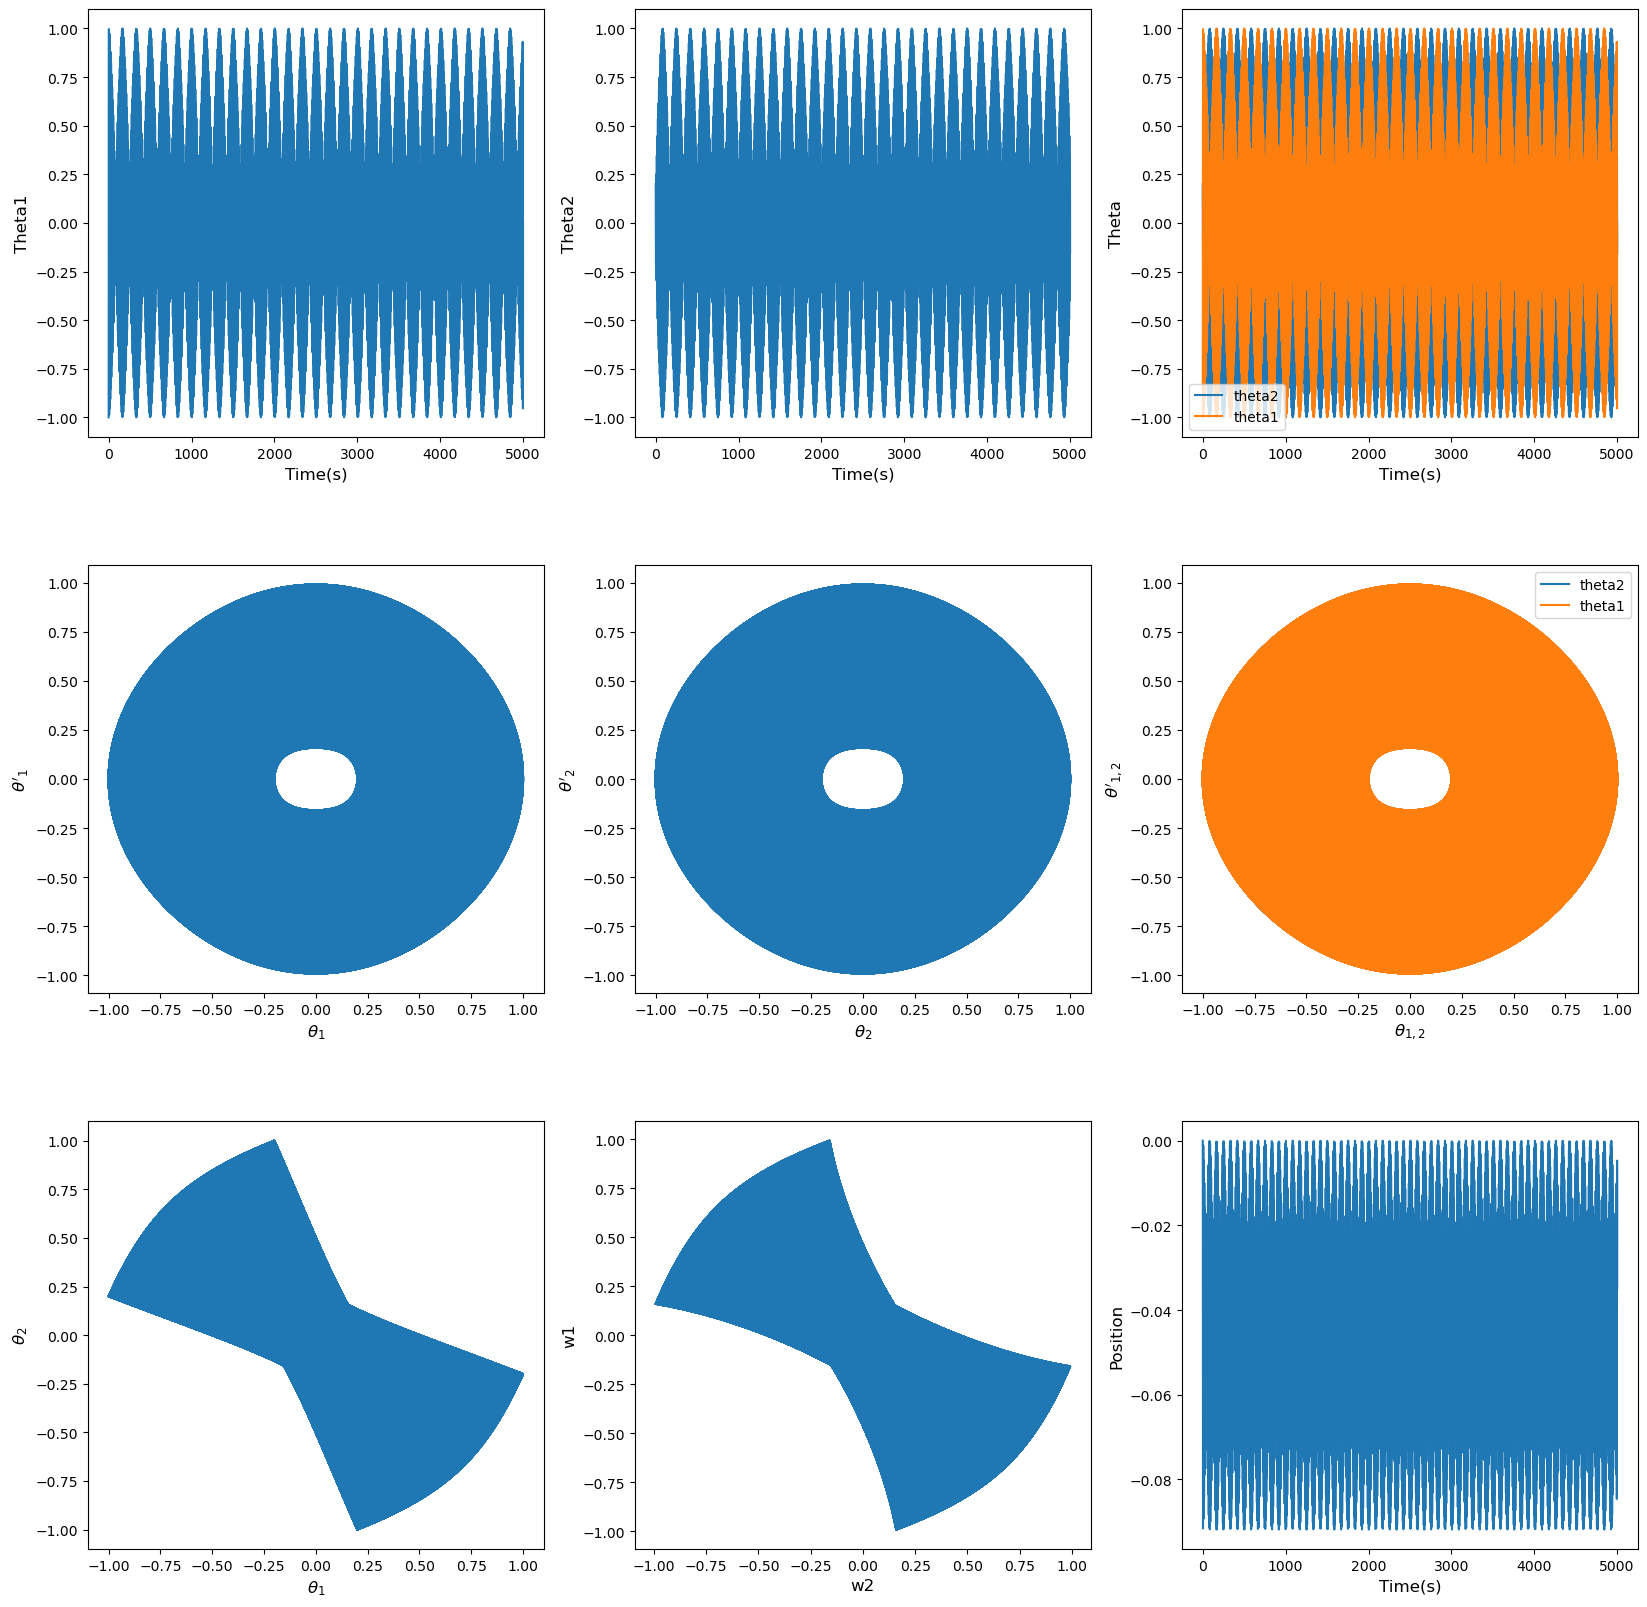

In [83]:
def show_plot(df):
  fig, axs = plt.subplots(3, 3,figsize=(20, 20))
  num = 12

  #plots theta1 against time
  axs[0,0].plot(df["t"], df["theta1"],label = "theta1")
  axs[0,0].set_xlabel('Time(s)', fontsize=num)
  axs[0,0].set_ylabel('Theta1', fontsize=num)

  #plots theta2 against time
  axs[0,1].plot(df["t"], df["theta2"],label = "theta2")
  axs[0,1].set_xlabel('Time(s)', fontsize=num)
  axs[0,1].set_ylabel('Theta2', fontsize=num)

  #plots both theta2 & theta1 against time
  axs[0,2].plot(df["t"], df["theta2"],label = "theta2")
  axs[0,2].plot(df["t"], df["theta1"],label = "theta1")
  axs[0,2].set_xlabel('Time(s)', fontsize=num)
  axs[0,2].set_ylabel('Theta', fontsize=num)
  axs[0,2].legend()

  #plots phase plot for pendulum1
  axs[1,0].plot(df["theta1"],df["w1"])
  axs[1,0].set_xlabel(r'$ \theta_{1}$',fontsize=num)
  axs[1,0].set_ylabel(r'$ {\theta^\prime}_{1}$',fontsize=num)

  #plots phase plot for pendulum2
  axs[1,1].plot(df["theta2"],df["w2"])
  axs[1,1].set_xlabel(r'$ \theta_{2}$',fontsize=num)
  axs[1,1].set_ylabel(r'$ {\theta^\prime}_{2}$',fontsize=num)

  #plots phase plot for both pendulum
  axs[1,2].plot(df["theta2"],df["w2"],label ="theta2")
  axs[1,2].plot(df["theta1"],df["w1"],label ="theta1")
  axs[1,2].set_xlabel(r'$ \theta_{1,2}$',fontsize=num)
  axs[1,2].set_ylabel(r'$ {\theta^\prime}_{1,2}$',fontsize=num)
  axs[1,2].legend( loc='upper right')

  #plots Beam velocity against Beam position
  axs[2,0].plot(df["theta2"],df["theta1"])
  axs[2,0].set_xlabel(r'$ \theta_{1}$', fontsize=num)
  axs[2,0].set_ylabel(r'$ \theta_{2}$', fontsize=num)

  #plots angular velocity of pendulum 1 against angular velocity of pendulum 2
  axs[2,1].plot(df["w2"],df["w1"])
  axs[2,1].set_xlabel('w2', fontsize=num)
  axs[2,1].set_ylabel('w1', fontsize=num)

  #plots Beam position against time
  axs[2,2].plot(df["t"], df["x"],label = "position")
  axs[2,2].set_xlabel('Time(s)', fontsize=num)
  axs[2,2].set_ylabel('Position', fontsize=num)
  plt.subplots_adjust(hspace=0.3)
  plt.show()
show_plot(df)

In [60]:
test = df

(0.1, 20.0)

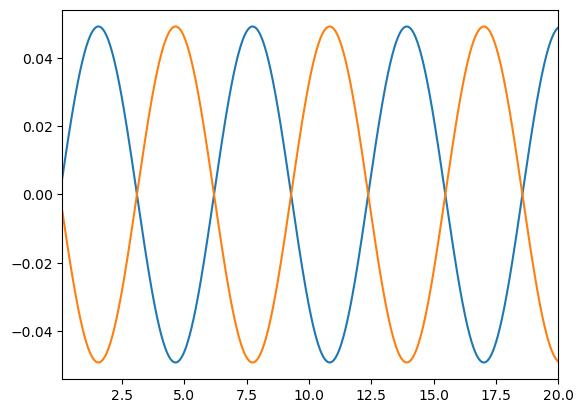

In [65]:
test["diff1"]= test["w1"]*np.cos(test["theta1"])
test["diff2"]=test["w2"]*np.cos(test["theta2"])
plt.plot(test["t"],test["diff1"])
plt.plot(test["t"],test["diff2"])
plt.xlim(a, 20)

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to compute FFT
def compute_fft(x, y):
    fft_result = np.fft.fft(y)
    fft_freq = np.fft.fftfreq(len(y), d=(x[1] - x[0]))
    fft_magnitude = np.abs(fft_result)
    positive_freqs = fft_freq[fft_freq >= 0]
    positive_magnitude = fft_magnitude[fft_freq >= 0]
    return positive_freqs, positive_magnitude

# Compute FFT for each dataset
positive_freqs, positive_magnitude = compute_fft(test["t"], test["theta1"])
positive_freqs1, positive_magnitude1 = compute_fft(test["t"], test["theta2"])
test["both"] = test["theta1"] + test["theta2"]
positive_freqs2, positive_magnitude2 = compute_fft(test["t"], test["both"])
positive_freqs3, positive_magnitude3 = compute_fft(test["t"], test["x"])
positive_freqs4, positive_magnitude4 = compute_fft(test["t"], test["w1"])
positive_freqs5, positive_magnitude5 = compute_fft(test["t"], test["w2"])

C:\Users\bluni\AppData\Local\Temp\ipykernel_1576\3921937901.py:42: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\bluni\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


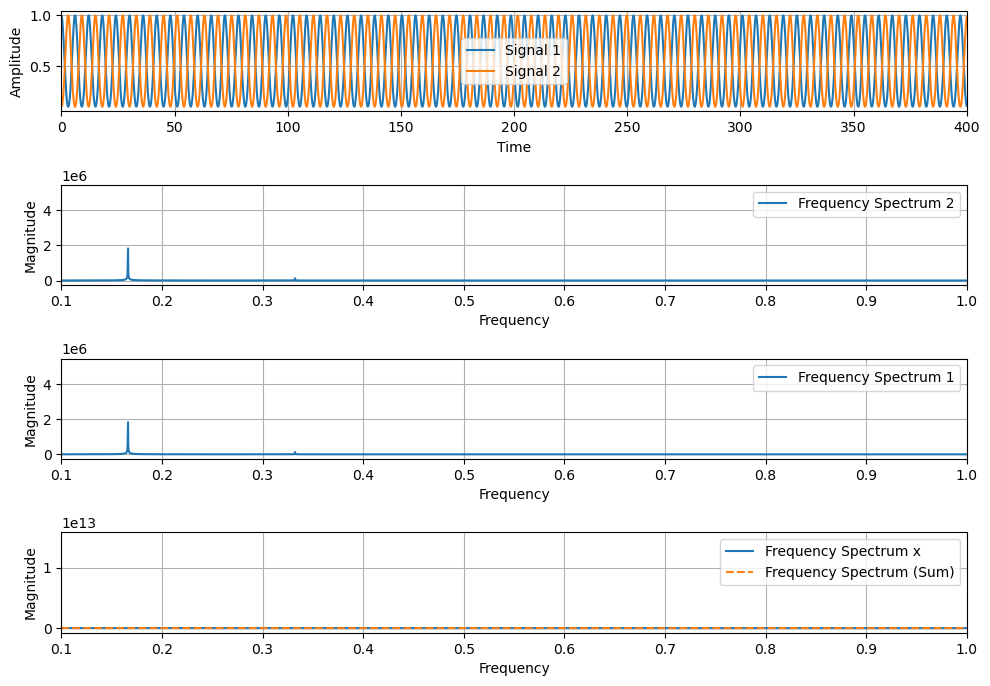

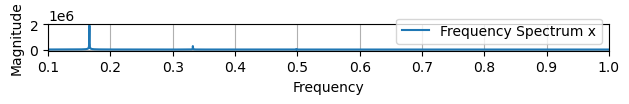

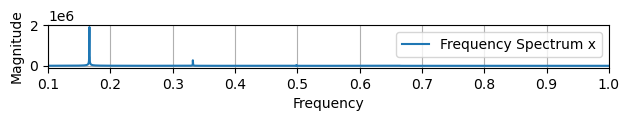

In [41]:
# Plot the original signals
plt.figure(figsize=(10, 10))
plt.subplot(6, 1, 1)
a = 0
plt.plot(test["t"], test["theta1"], label="Signal 1")
plt.plot(test["t"]+a, test["theta2"], label="Signal 2")
# plt.plot(test["t"], test["x"], label="Signal 2")
# plt.plot(test["t"], test["both"], label="Signal 1 + Signal 2", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xlim(a, 400)
plt.legend()
plt.grid()
a= 0.1
b= 1

# Plot the FFT spectra
plt.subplot(6, 1, 2)
plt.plot(positive_freqs1, positive_magnitude1, label="Frequency Spectrum 2")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.xlim(a,b)  # Adjust range dynamically if needed
plt.legend()
plt.grid()
# Plot the FFT spectra
plt.subplot(6, 1, 3)
plt.plot(positive_freqs, positive_magnitude, label="Frequency Spectrum 1")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.xlim(a,b)  # Adjust range dynamically if needed
plt.legend()
plt.grid()
# Plot the FFT spectra
plt.subplot(6, 1, 4)
plt.plot(positive_freqs3, positive_magnitude3, label="Frequency Spectrum x")
plt.plot(positive_freqs2, positive_magnitude2, label="Frequency Spectrum (Sum)", linestyle="dashed")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.xlim(a,b)  # Adjust range dynamically if needed
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
plt.subplot(6, 1, 5)
plt.plot(positive_freqs4, positive_magnitude4, label="Frequency Spectrum x")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.xlim(a,b) # Adjust range dynamically if needed
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
plt.subplot(6, 1, 6)
plt.plot(positive_freqs5, positive_magnitude5, label="Frequency Spectrum x")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.xlim(a,b)  # Adjust range dynamically if needed
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [37]:
from scipy.signal import find_peaks

def find_fft_peaks(positive_freqs, positive_magnitude, height=None):
    """
    Finds peaks in the FFT magnitude spectrum and returns the frequencies and magnitudes of the peaks.
    Args:
        positive_freqs (numpy array): Positive frequencies.
        positive_magnitude (numpy array): FFT magnitudes corresponding to the positive frequencies.
        height (float): Minimum height for a peak to be considered significant.
    Returns:
        peak_freqs (numpy array): Frequencies corresponding to the peaks.
        peak_magnitudes (numpy array): Magnitudes of the detected peaks.
    """
    peaks, _ = find_peaks(positive_magnitude, height=height)
    peak_freqs = positive_freqs[peaks]
    peak_magnitudes = positive_magnitude[peaks]
    return peak_freqs, peak_magnitudes


In [38]:
# Find peaks for Signal 1
peak_freqs, peak_magnitudes = find_fft_peaks(positive_freqs, positive_magnitude, height=0.1)

# Find peaks for Signal 2
peak_freqs1, peak_magnitudes1 = find_fft_peaks(positive_freqs1, positive_magnitude1, height=0.1)

# Find peaks for the combined Signal
peak_freqs2, peak_magnitudes2 = find_fft_peaks(positive_freqs2, positive_magnitude2, height=0.1)

# Find peaks for the combined Signal
peak_freqs3, peak_magnitudes3 = find_fft_peaks(positive_freqs3, positive_magnitude3, height=0.1)


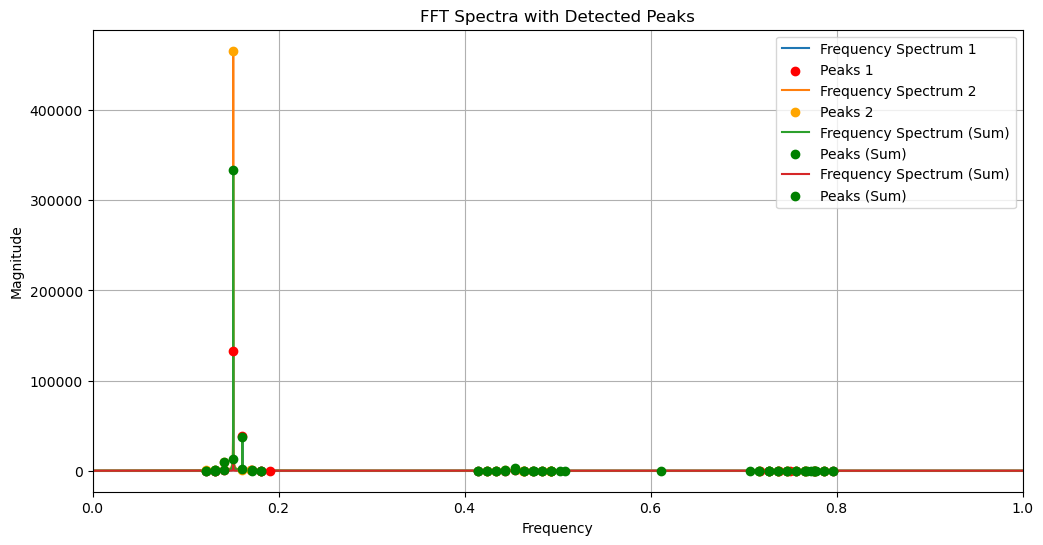

In [13]:
# Plot the FFT spectra with peaks
plt.figure(figsize=(12, 6))

# Frequency Spectrum 1
plt.plot(positive_freqs, positive_magnitude, label="Frequency Spectrum 1")
plt.scatter(peak_freqs, peak_magnitudes, color="red", label="Peaks 1", zorder=5)

# Frequency Spectrum 2
plt.plot(positive_freqs1, positive_magnitude1, label="Frequency Spectrum 2")
plt.scatter(peak_freqs1, peak_magnitudes1, color="orange", label="Peaks 2", zorder=5)

# Frequency Spectrum (Sum)
plt.plot(positive_freqs2, positive_magnitude2, label="Frequency Spectrum (Sum)")
plt.scatter(peak_freqs2, peak_magnitudes2, color="green", label="Peaks (Sum)", zorder=5)

plt.plot(positive_freqs3, positive_magnitude3, label="Frequency Spectrum (Sum)")
plt.scatter(peak_freqs3, peak_magnitudes3, color="green", label="Peaks (Sum)", zorder=5)

plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.xlim(0, 1)  # Adjust the range as needed
plt.legend()
plt.grid()
plt.title("FFT Spectra with Detected Peaks")
plt.show()


In [39]:
import pandas as pd

def display_peaks(peak_freqs, peak_magnitudes, signal_name="Signal", top_n=7):
    """
    Display the top peak frequencies and magnitudes in a table format.
    Args:
        peak_freqs (numpy array): Array of peak frequencies.
        peak_magnitudes (numpy array): Array of corresponding magnitudes.
        signal_name (str): Name of the signal for labeling.
        top_n (int): Number of top peaks to display (default: 7).
    """
    # Create a DataFrame for better visualization
    data = {"Frequency (Hz)": peak_freqs, "Magnitude": peak_magnitudes}
    df = pd.DataFrame(data)
    
    # Sort by magnitude in descending order
    df = df.sort_values(by="Magnitude", ascending=False)
    
    # Select the top N peaks
    df = df.head(top_n)
    
    print(f"\nTop {top_n} Peaks for {signal_name}:\n")
    print(df.to_string(index=False))  # Print table without index



In [40]:
# Display peaks for Signal 1
display_peaks(peak_freqs, peak_magnitudes, signal_name="Signal 1")

# Display peaks for Signal 2
display_peaks(peak_freqs1, peak_magnitudes1, signal_name="Signal 2")

# Display peaks for Combined Signal
display_peaks(peak_freqs2, peak_magnitudes2, signal_name="Combined Signal")

# Display peaks for x
display_peaks(peak_freqs3, peak_magnitudes3, signal_name="Signal x")


Top 7 Peaks for Signal 1:

 Frequency (Hz)    Magnitude
        0.16625 1.825579e+06
        0.33225 1.288091e+05
        0.49850 1.095109e+04
        0.66475 2.261887e+03
        0.50325 6.911953e+02
        0.83075 6.348533e+02
        0.83550 3.809615e+02

Top 7 Peaks for Signal 2:

 Frequency (Hz)    Magnitude
        0.16625 1.825593e+06
        0.33225 1.303065e+05
        0.49850 1.090962e+04
        0.66450 1.681378e+03
        0.36075 8.536026e+02
        0.50500 5.939173e+02
        0.83075 5.874447e+02

Top 7 Peaks for Combined Signal:

 Frequency (Hz)     Magnitude
        0.33225 259108.885696
        0.66475   3598.186258
        0.99700     43.749215
        0.99850     36.313382
        1.32925     28.646626
        1.33175     25.329340
        1.66150     19.781627

Top 7 Peaks for Signal x:

Empty DataFrame
Columns: [Frequency (Hz), Magnitude]
Index: []


In [213]:
1/0.1540

6.4935064935064934

In [217]:
lag*0.001/2/np.pi

6.169482214014232

# Predicted freqency

In [42]:
a = 1
b = 1
g = R+2

402

In [45]:
math.sqrt(a/(1-(2*b/g)))/(2*math.pi)

0.15955233432995383

In [46]:
math.sqrt(a)/(2*math.pi)

0.15915494309189535

# Energy

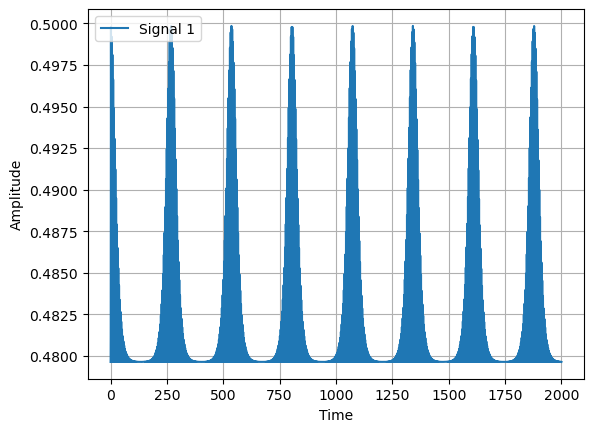

In [58]:
import numpy as np

test["E1"] = 0.5 * test["w1"]*test["w1"] + 1 - np.cos(test["theta1"])
test["E2"] = 0.5 * test["w2"]*test["w2"] + 1 - np.cos(test["theta2"])
test["E"] = test["E1"]+test["E2"]
# plt.plot(test["t"], test["E1"], label="Signal 1")
# plt.plot(test["t"], test["E2"], label="Signal 1")
plt.plot(test["t"], test["E"], label="Signal 1")
# plt.plot(test["t"], test["both"], label="Signal 1 + Signal 2", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

# Poincare section

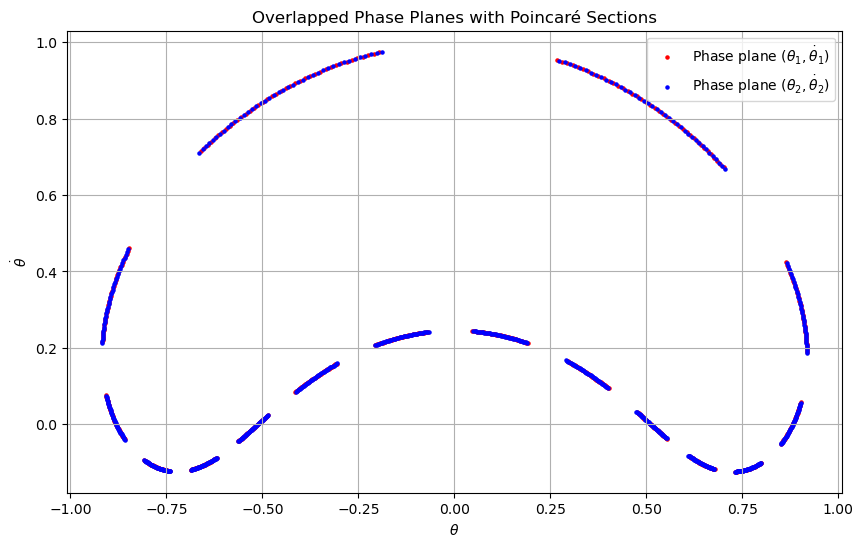

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Assume these are your time-series data
# Replace these arrays with your actual data
time = np.linspace(0, 100, 10000)  # Time points
theta1 = test["theta1"]  # Example data for theta1(t)
theta2 = test["theta2"]  # Example data for theta2(t)
omega1 =test["w1"]  # Example data for omega1(t)
omega2 = test["w2"]  # Example data for omega2(t)

# Define the Poincaré section condition
def poincare_section(theta_i, omega_i, theta_j, omega_j):
    """
    Extracts points for the Poincaré section.
    Args:
        theta_i: Array of theta_i values
        omega_i: Array of omega_i values
        theta_j: Array of theta_j values
        omega_j: Array of omega_j values
    Returns:
        poincare_theta: Extracted theta_i values for the Poincaré section
        poincare_omega: Extracted omega_i values for the Poincaré section
    """
    poincare_theta = []
    poincare_omega = []

    for k in range(1, len(theta_j)):
        # Check if theta_j crosses 0 and omega_j > 0
        if theta_j[k - 1] < 0 and theta_j[k] > 0 and omega_j[k] > 0:
            poincare_theta.append(theta_i[k])
            poincare_omega.append(omega_i[k])

    return np.array(poincare_theta), np.array(poincare_omega)

# Compute Poincaré sections for both cases
# Case 1: (theta1, omega1) with theta2 = 0 and omega2 > 0
poincare_theta1, poincare_omega1 = poincare_section(theta1, omega1, theta2, omega2)

# Case 2: (theta2, omega2) with theta1 = 0 and omega1 > 0
poincare_theta2, poincare_omega2 = poincare_section(theta2, omega2, theta1, omega1)

# Plot the overlapped phase planes
plt.figure(figsize=(10, 6))

# Phase plane for (theta1, omega1)
plt.scatter(poincare_theta1, poincare_omega1, s=5, color='red', label=r"Phase plane $(\theta_1, \dot{\theta}_1)$")

# Phase plane for (theta2, omega2)
plt.scatter(poincare_theta2, poincare_omega2, s=5, color='blue', label=r"Phase plane $(\theta_2, \dot{\theta}_2)$")

plt.xlabel(r"$\theta$")
plt.ylabel(r"$\dot{\theta}$")
plt.title("Overlapped Phase Planes with Poincaré Sections")
plt.legend()
plt.grid()
plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Poincaré section function
def poincare_section(data, var_i, var_j, condition_var, condition_rate):
    """
    Extracts Poincaré section points based on the specified condition.
    Args:
        data: DataFrame containing the simulation results.
        var_i: Name of the variable for theta_i.
        var_j: Name of the variable for w_i.
        condition_var: Name of the variable for theta_j (Poincaré condition).
        condition_rate: Name of the variable for w_j (Poincaré condition).
    Returns:
        poincare_theta: Array of theta_i values for the Poincaré section.
        poincare_omega: Array of w_i values for the Poincaré section.
    """
    poincare_theta = []
    poincare_omega = []

    theta_j = data[condition_var]
    omega_j = data[condition_rate]
    theta_i = data[var_i]
    omega_i = data[var_j]

    for k in range(1, len(theta_j)):
        # Check for crossing condition (theta_j = 0, w_j > 0)
        if theta_j[k - 1] < 0 and theta_j[k] > 0 and omega_j[k] > 0:
            poincare_theta.append(theta_i[k])
            poincare_omega.append(omega_i[k])

    return np.array(poincare_theta), np.array(poincare_omega)

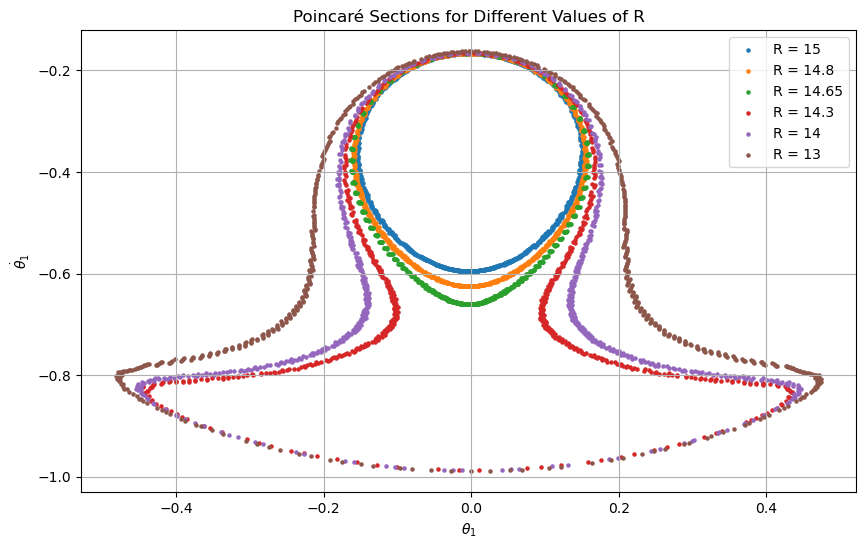

In [10]:


# Range of R values
R_values = [15,14.8,14.65,14.3,14,13]

# Plot Poincaré sections for different R values
plt.figure(figsize=(10, 6))
for R in R_values:
    # Generate data using rk4
    data = rk4(theta1, theta2, w1, w2, x, v, l1, l2, R, k, c_x, dt, N)
    #converting the data to a dataframe
    df = pd.DataFrame(data)
    df.columns = ["theta1","theta2","w1","w2","x","v_x","t"]

    # Extract Poincaré section for (theta1, w1) with theta2 = 0 and w2 > 0
    poincare_theta, poincare_omega = poincare_section(df, "theta1", "w1", "theta2", "w2")

    # Plot the Poincaré section
    plt.scatter(poincare_theta, poincare_omega, s=5, label=f"R = {R}")

# Customize the plot
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\dot{\theta}_1$")
plt.title("Poincaré Sections for Different Values of R")
plt.legend()
plt.grid()
plt.show()


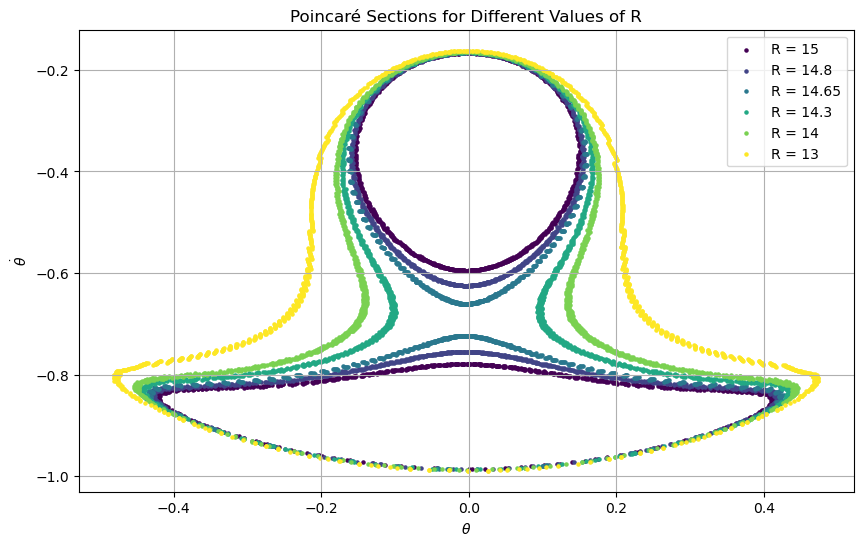

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the range of R values
R_values = [15, 14.8, 14.65, 14.3, 14, 13]

# Create a color map for R values
colors = plt.cm.viridis(np.linspace(0, 1, len(R_values)))  # Using the "viridis" colormap

# Plot Poincaré sections for different R values
plt.figure(figsize=(10, 6))

for i, R in enumerate(R_values):
    # Generate data using rk4 (placeholder example)
    data = rk4(theta1, theta2, w1, w2, x, v, l1, l2, R, k, c_x, dt, N)
    
    # Convert the data to a DataFrame
    df = pd.DataFrame(data)
    df.columns = ["theta1", "theta2", "w1", "w2", "x", "v_x", "t"]

    # Extract Poincaré section for (theta1, w1) with theta2 = 0 and w2 > 0
    poincare_theta, poincare_omega = poincare_section(df, "theta2", "w2", "theta1", "w1")
    poincare_theta1, poincare_omega1 = poincare_section(df, "theta1", "w1", "theta2", "w2")

    # Plot both sections using the same color for R
    plt.scatter(poincare_theta1, poincare_omega1, s=5, label=f"R = {R}", color=colors[i])
    plt.scatter(poincare_theta, poincare_omega, s=5, color=colors[i])

# Customize the plot
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\dot{\theta}$")
plt.title("Poincaré Sections for Different Values of R")
plt.legend()
plt.grid()
plt.show()



# We now looking at phase space

In [10]:
theta1 = 0.2
theta2 = -1
w1 = 0  #angular velocity of ball 1
w2 = 0  #angular velocity of ball 2
l1 = 1  #length of pendulum 1
l2 = 1  #length of pendulum 2
x = 0   #position of the center of beam
v = 0   # velocity of the beam
R = 14.6# The Big mass to ball mass ratio
dt = 0.01 # time step
N = 1_000_000 # number of steps
k = 0  #spring constant
c_x = 0 #damping constant
data = rk4(theta1,theta2,w1,w2,x,v,l1,l2,R,k,c_x,dt,N)

In [22]:
import numpy as np

# Example dummy data:
dt = 0.01
t = test["t"]  # time array from 0 to 10 seconds
theta1 = test["theta1"]           # dummy theta1 data (replace with your simulation results)
w1 = test["w1"]                # dummy w1 data (replace with your simulation results)

def find_zero_crossings(t, theta, w, tol=1e-8):
    """
    Find approximate times and theta values where w crosses zero.
    
    Parameters:
        t     : array-like, time values.
        theta : array-like, theta values corresponding to t.
        w     : array-like, angular velocity values corresponding to t.
        tol   : tolerance for considering a value as zero.
        
    Returns:
        crossings: a numpy array of shape (n, 2) where each row is (t_zero, theta_zero).
    """
    crossings = []
    for i in range(len(w) - 1):
        # Check if w[i] is effectively zero:
        if np.isclose(w[i], 0, atol=tol):
            crossings.append((t[i], theta[i]))
        # Check for a sign change between w[i] and w[i+1]:
        elif w[i] * w[i+1] < 0:
            # Linear interpolation to find the zero-crossing time:
            t_zero = t[i] - w[i] * (t[i+1] - t[i]) / (w[i+1] - w[i])
            # And the corresponding theta:
            theta_zero = theta[i] + (theta[i+1] - theta[i]) * (t_zero - t[i]) / (t[i+1] - t[i])
            crossings.append((t_zero, theta_zero))
    return np.array(crossings)

# Find the zero crossings for w1:
zero_crossings = find_zero_crossings(t, theta1, w1)

if zero_crossings.size == 0:
    print("No zero crossing was found for w1.")
else:
    # Compute the absolute values of theta at the zero crossings:
    abs_theta = np.abs(zero_crossings[:, 1])
    # Find the index of the crossing with the lowest absolute theta:
    min_index = np.argmin(abs_theta)
    min_t, min_theta = zero_crossings[min_index]
    
    print(f"Lowest absolute theta1 when w1 is zero:")
    print(f"Time: {min_t:.4f} s, theta1: {min_theta:.4f} (|theta1| = {abs_theta[min_index]:.4f})")


Lowest absolute theta1 when w1 is zero:
Time: 0.0000 s, theta1: 0.2000 (|theta1| = 0.2000)


Running simulation for R = 0.01 ...
Lowest absolute theta1 when w1 is zero:
Time: 1037.0226 s, theta1: 0.0924 (|theta1| = 0.0924)


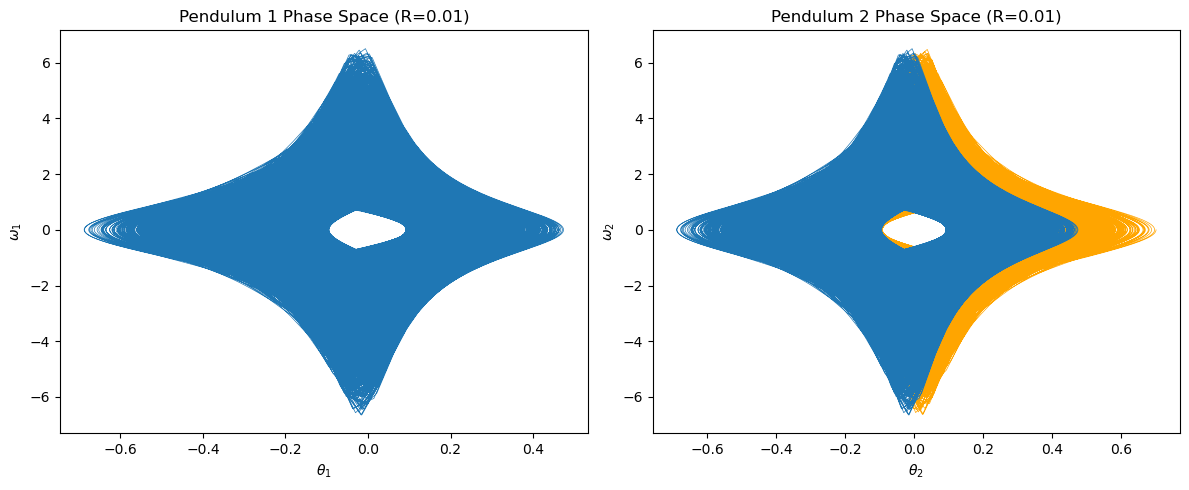

Running simulation for R = 0.12 ...
Lowest absolute theta1 when w1 is zero:
Time: 344.6026 s, theta1: 0.1000 (|theta1| = 0.1000)


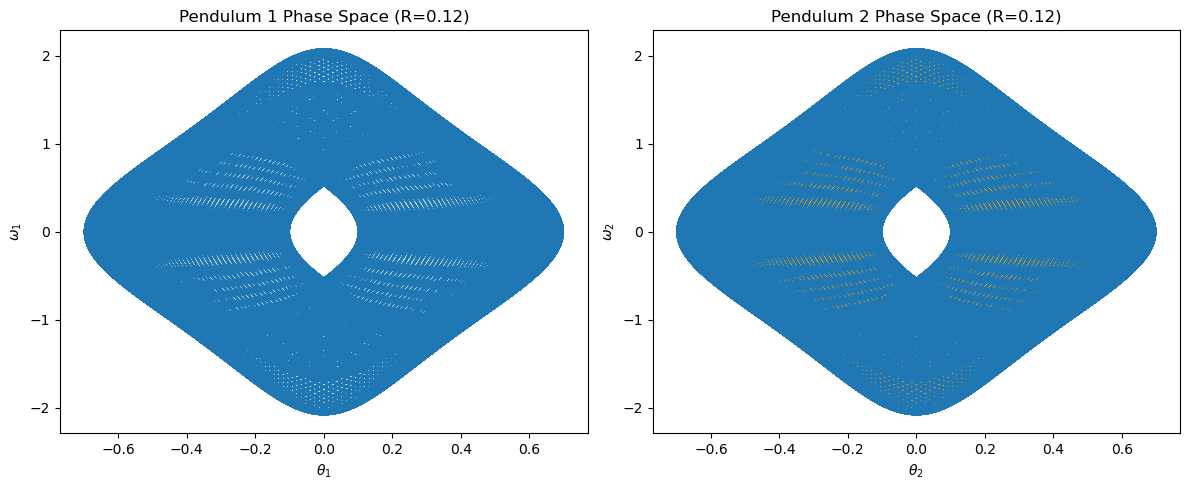

Running simulation for R = 0.23 ...
Lowest absolute theta1 when w1 is zero:
Time: 2264.3316 s, theta1: -0.1000 (|theta1| = 0.1000)


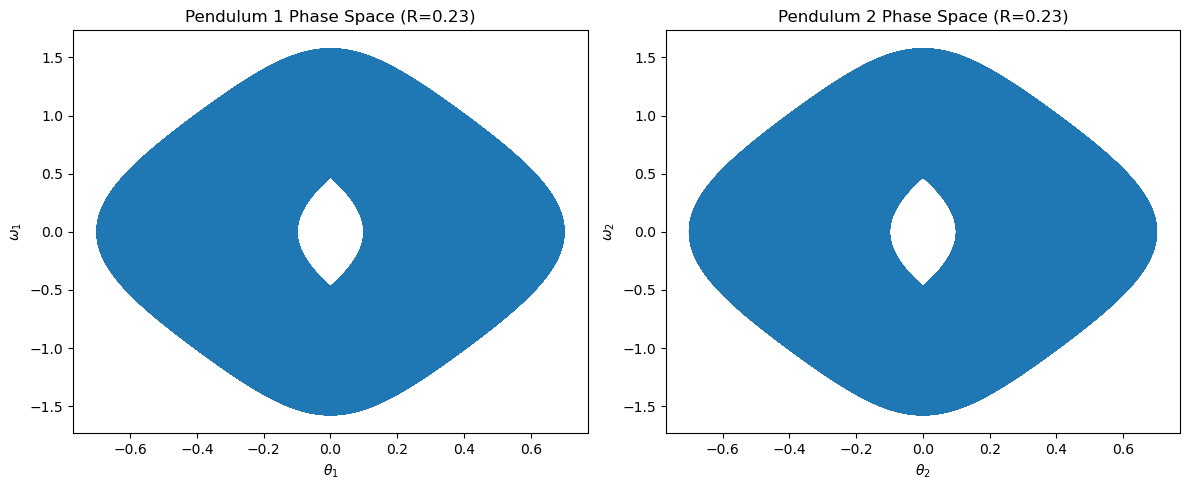

Running simulation for R = 0.34 ...
Lowest absolute theta1 when w1 is zero:
Time: 1863.2127 s, theta1: 0.1000 (|theta1| = 0.1000)


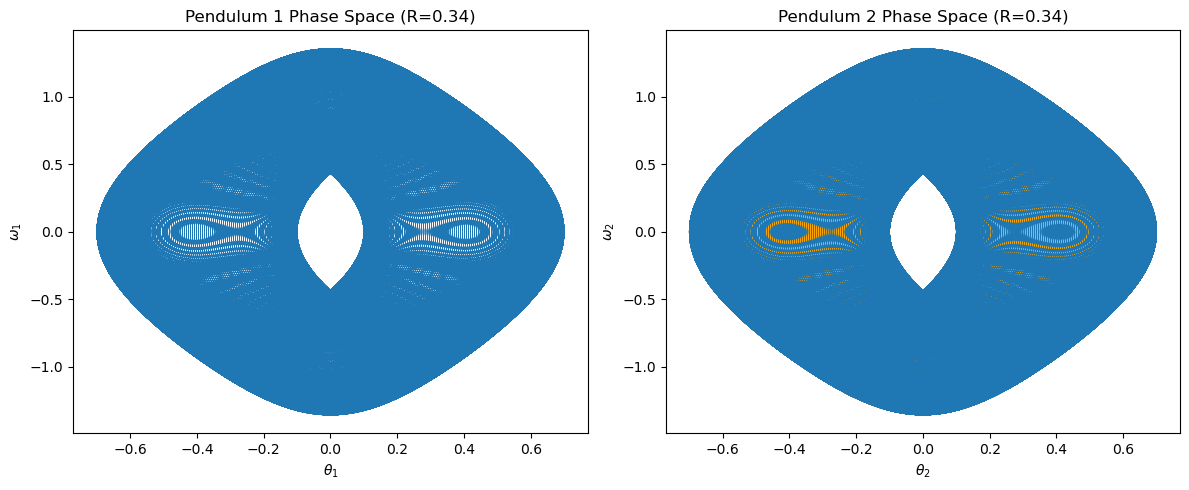

Running simulation for R = 0.45 ...
Lowest absolute theta1 when w1 is zero:
Time: 1947.7494 s, theta1: -0.1000 (|theta1| = 0.1000)


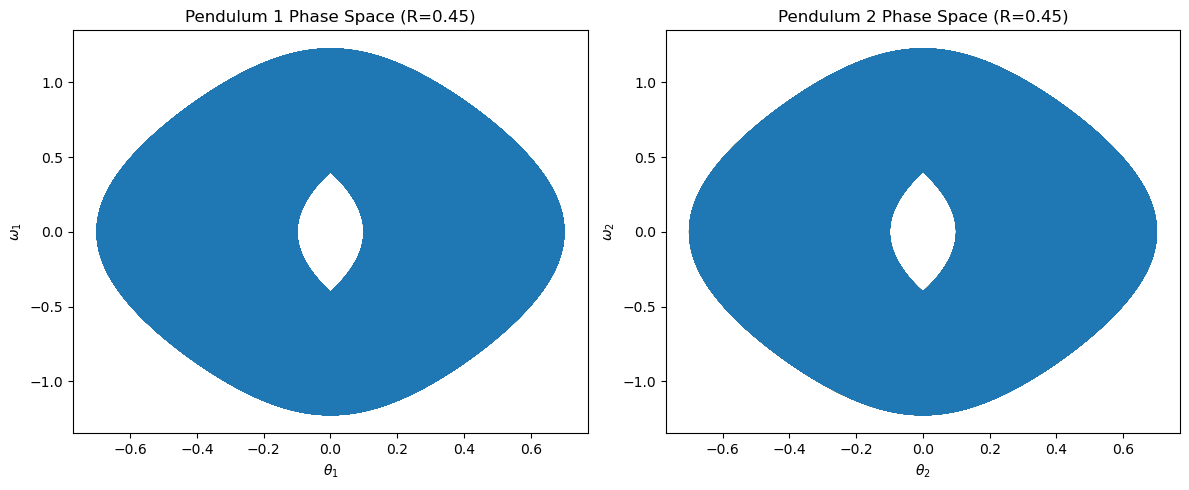

Running simulation for R = 0.56 ...
Lowest absolute theta1 when w1 is zero:
Time: 3956.5046 s, theta1: 0.1000 (|theta1| = 0.1000)


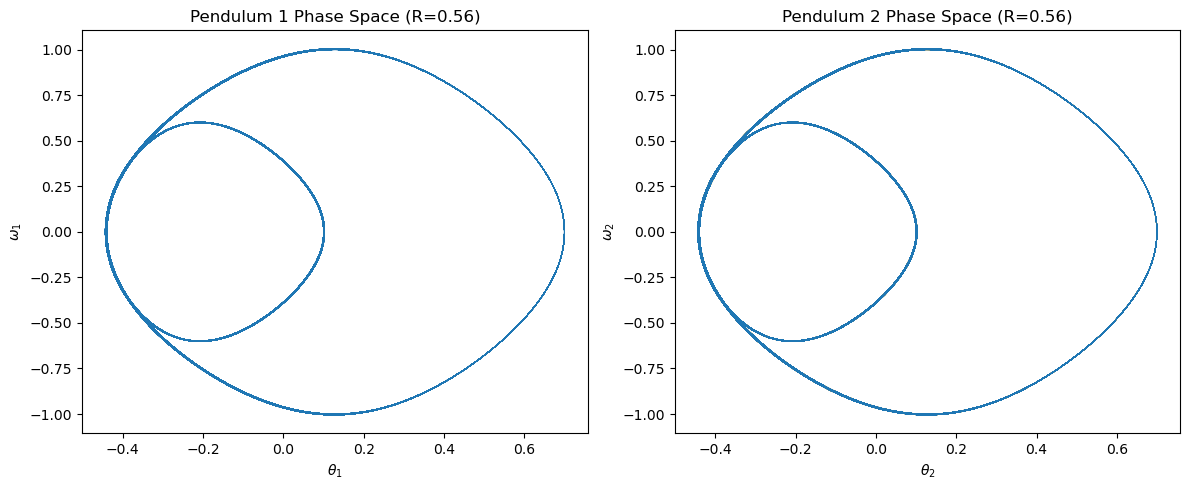

Running simulation for R = 0.67 ...
Lowest absolute theta1 when w1 is zero:
Time: 587.7694 s, theta1: -0.1000 (|theta1| = 0.1000)


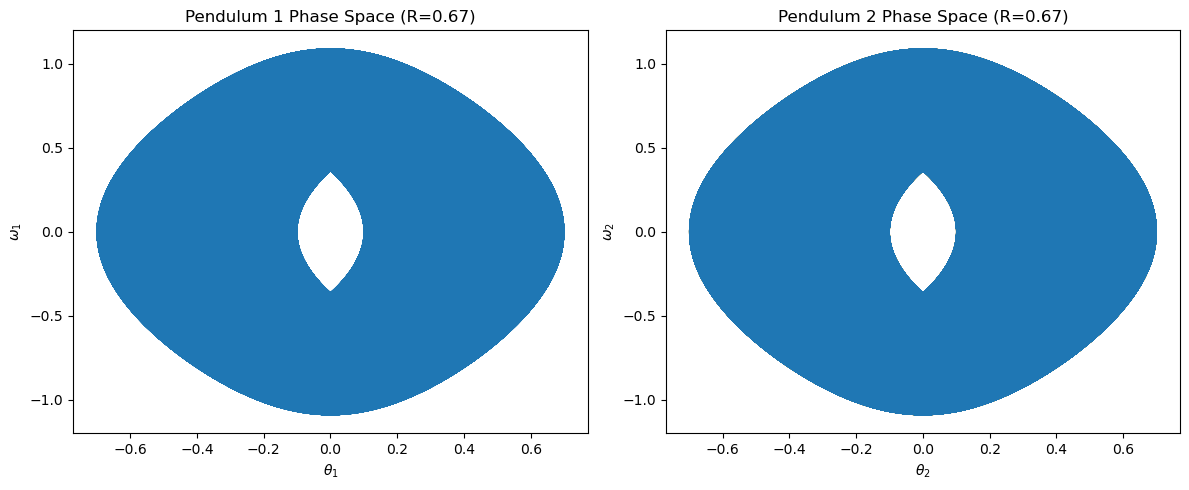

Running simulation for R = 0.78 ...
Lowest absolute theta1 when w1 is zero:
Time: 3460.8781 s, theta1: -0.1000 (|theta1| = 0.1000)


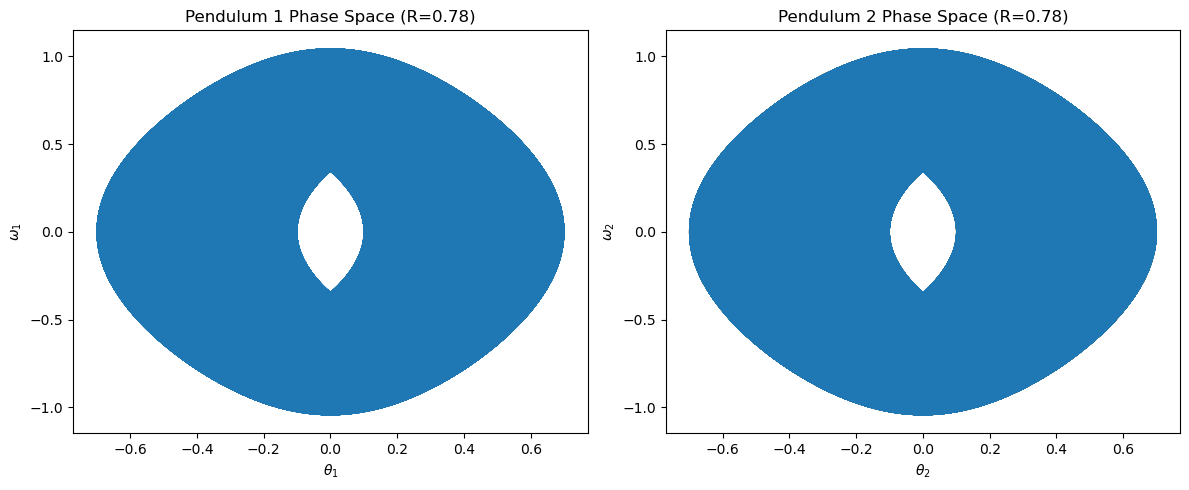

Running simulation for R = 0.89 ...
Lowest absolute theta1 when w1 is zero:
Time: 0.0000 s, theta1: 0.1000 (|theta1| = 0.1000)


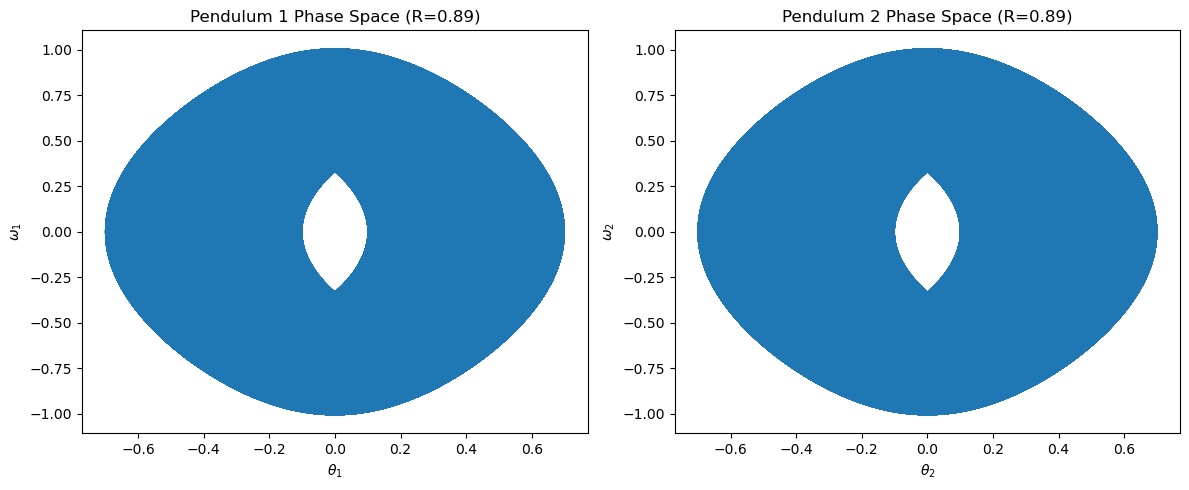

Running simulation for R = 1.00 ...
Lowest absolute theta1 when w1 is zero:
Time: 3510.6609 s, theta1: -0.1000 (|theta1| = 0.1000)


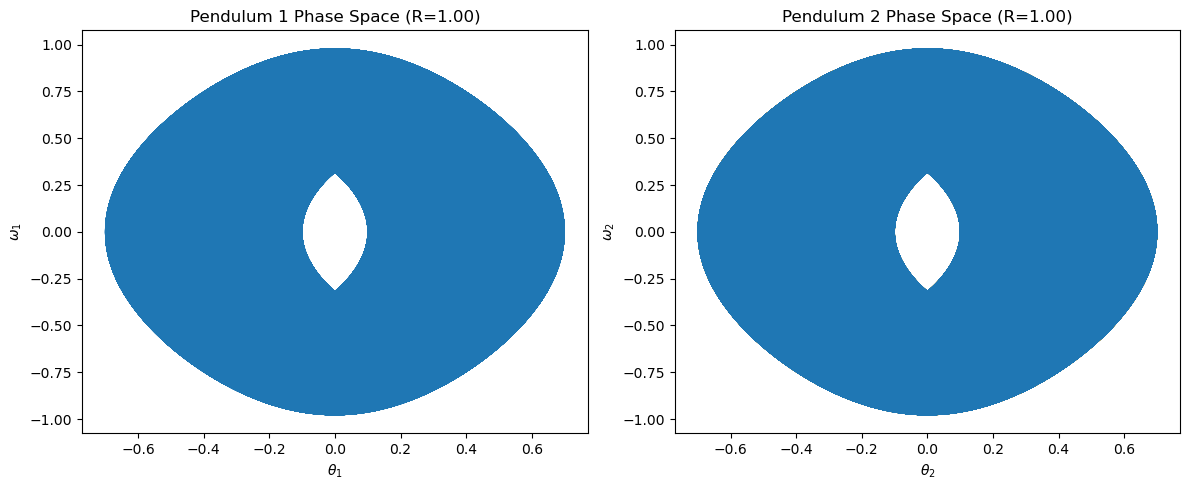

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# --- Define your rk4 function here or import it ---
# For example:
# def rk4(theta1, theta2, w1, w2, x, v, l1, l2, R, k, c_x, dt, N):
#     # Your RK4 integration code goes here...
#     # It should return an array of shape (N+1, 6) where columns correspond to:
#     # [theta1, theta2, w1, w2, x, v]
#     pass

# --- Parameters common to all runs ---
theta1_0 = 0.1
theta2_0 = 0.7
w1_0 = 0    # initial angular velocity for pendulum 1
w2_0 = 0    # initial angular velocity for pendulum 2
l1 = 1      # length of pendulum 1
l2 = 1      # length of pendulum 2
x0 = 0      # initial beam position
v0 = 0      # initial beam velocity
dt = 0.008   # time step
N = 500_000 # number of steps
k = 0       # spring constant
c_x = 0     # damping constant

# --- Define the range for R (Big mass to ball mass ratio) ---
R_values = np.linspace(0.01, 1, 10)  # you can adjust the number of values if needed

def find_zero_crossings(t, theta, w, tol=1e-9):
    """
    Find approximate times and theta values where w crosses zero.
    
    Parameters:
        t     : array-like, time values.
        theta : array-like, theta values corresponding to t.
        w     : array-like, angular velocity values corresponding to t.
        tol   : tolerance for considering a value as zero.
        
    Returns:
        crossings: a numpy array of shape (n, 2) where each row is (t_zero, theta_zero).
    """
    crossings = []
    for i in range(len(w) - 1):
        # Check if w[i] is effectively zero:
        if np.isclose(w[i], 0, atol=tol):
            crossings.append((t[i], theta[i]))
        # Check for a sign change between w[i] and w[i+1]:
        elif w[i] * w[i+1] < 0:
            # Linear interpolation to find the zero-crossing time:
            t_zero = t[i] - w[i] * (t[i+1] - t[i]) / (w[i+1] - w[i])
            # And the corresponding theta:
            theta_zero = theta[i] + (theta[i+1] - theta[i]) * (t_zero - t[i]) / (t[i+1] - t[i])
            crossings.append((t_zero, theta_zero))
    return np.array(crossings)



for R in R_values:
    print(f"Running simulation for R = {R:.2f} ...")
    
    # Run the simulation with the current R value.
    # It's assumed that rk4 returns an array of shape (N+1, 6)
    # with columns: [theta1, theta2, w1, w2, x, v]
    data = rk4(theta1_0, theta2_0, w1_0, w2_0, x0, v0, l1, l2, R, k, c_x, dt, N)
    #converting the data to a dataframe
    df = pd.DataFrame(data)
    df.columns = ["theta1","theta2","w1","w2","x","v_x","t"]
    
    # Extract the variables for the phase space plots:
    theta1 = df["theta1"]
    theta2 = df["theta2"]
    w1 = df["w1"]
    w2 = df["w2"]
    t = df["t"]
    
        # Find the zero crossings for w1:
    zero_crossings = find_zero_crossings(t, theta1, w1)

    if zero_crossings.size == 0:
        print("No zero crossing was found for w1.")
    else:
        # Compute the absolute values of theta at the zero crossings:
        abs_theta = np.abs(zero_crossings[:, 1])
        # Find the index of the crossing with the lowest absolute theta:
        min_index = np.argmin(abs_theta)
        min_t, min_theta = zero_crossings[min_index]

        print(f"Lowest absolute theta1 when w1 is zero:")
        print(f"Time: {min_t:.4f} s, theta1: {min_theta:.4f} (|theta1| = {abs_theta[min_index]:.4f})")
    
    # --- Plot phase space for Pendulum 1 and Pendulum 2 ---
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    axs[0].plot(theta1, w1, lw=0.5)
    axs[0].set_xlabel(r'$\theta_1$')
    axs[0].set_ylabel(r'$\omega_1$')
    axs[0].set_title(f'Pendulum 1 Phase Space (R={R:.2f})')
    
    axs[1].plot(theta2, w2, lw=0.5, color='orange')
    axs[1].plot(theta1, w1, lw=0.5)
    axs[1].set_xlabel(r'$\theta_2$')
    axs[1].set_ylabel(r'$\omega_2$')
    
    axs[1].set_title(f'Pendulum 2 Phase Space (R={R:.2f})')
    
    plt.tight_layout()
    plt.show()


Running simulation for R = 1.00 ...
9.867411291865358e-06
1.7484789051300763e-05


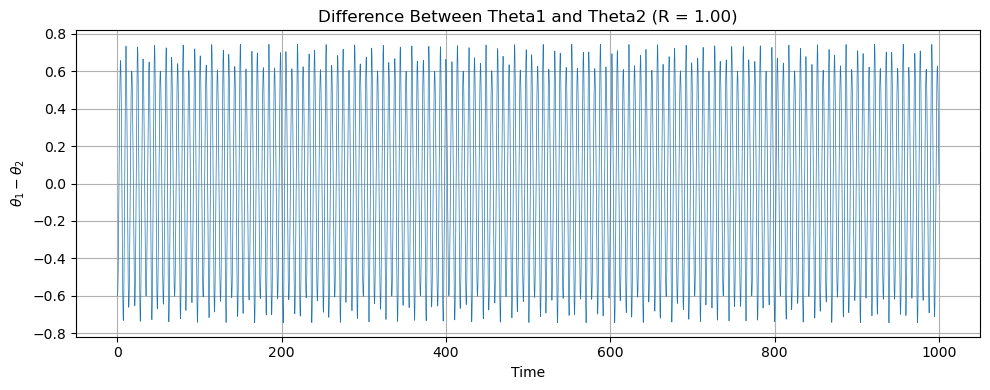

Running simulation for R = 2.00 ...
9.867411291865358e-06
1.7484789051300763e-05


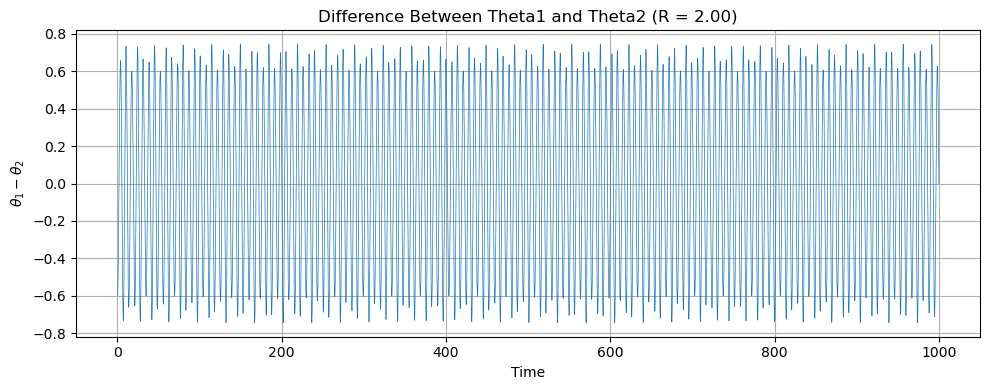

Running simulation for R = 3.00 ...
9.867411291865358e-06
1.7484789051300763e-05


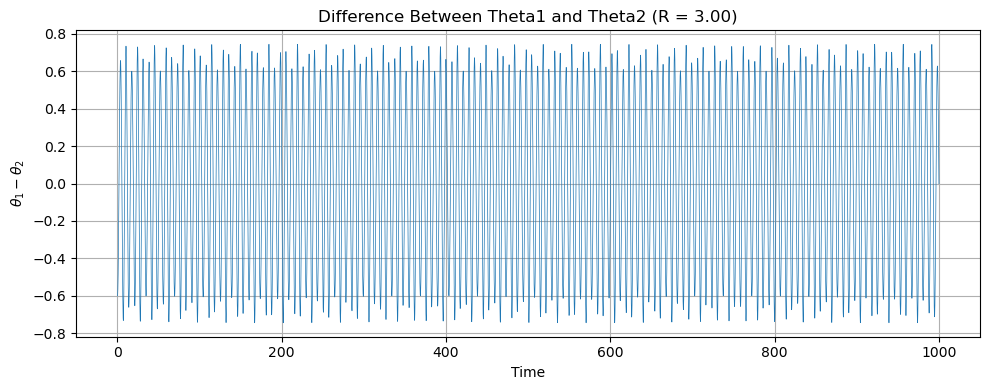

Running simulation for R = 4.00 ...
9.867411291865358e-06
1.7484789051300763e-05


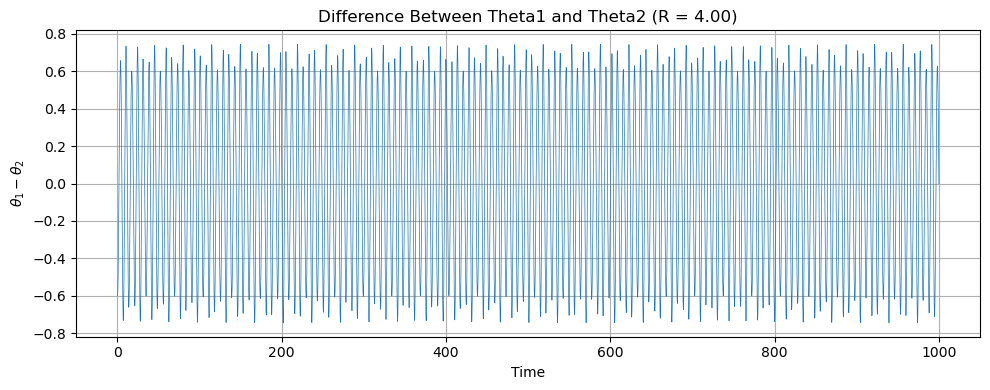

Running simulation for R = 5.00 ...
9.867411291865358e-06
1.7484789051300763e-05


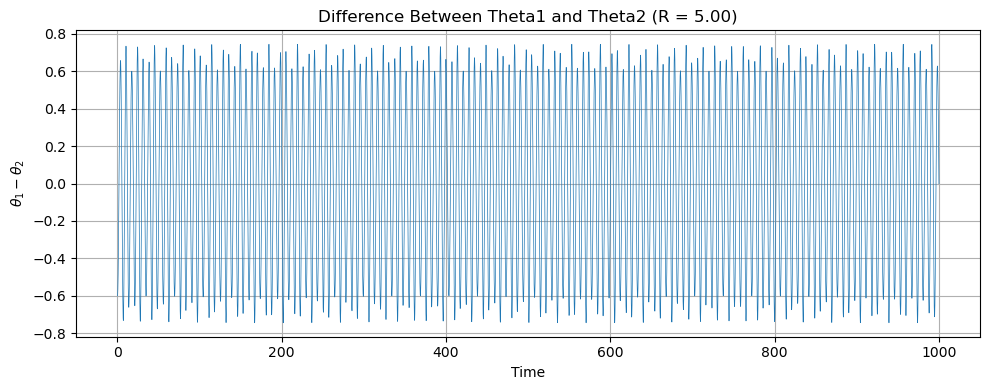

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# --- Define your rk4 function here or import it ---
# For example:
# def rk4(theta1, theta2, w1, w2, x, v, l1, l2, R, k, c_x, dt, N):
#     # Your RK4 integration code here...
#     # It should return an array of shape (N+1, 6) where columns correspond to:
#     # [theta1, theta2, w1, w2, x, v]
#     pass

# --- Initial Conditions and Parameters ---
theta1_0 = 0.2
theta2_0 = 1
w1_0 = 0    # initial angular velocity for pendulum 1
w2_0 = 0    # initial angular velocity for pendulum 2
l1 = 1      # length of pendulum 1
l2 = 1      # length of pendulum 2
x0 = 0      # initial beam position
v0 = 0      # initial beam velocity
dt = 0.01   # time step
N = 400_000  # number of steps
k = 0       # spring constant
c_x = 0     # damping constant

# Create an array for time values (assumes constant dt)
t = np.linspace(0, dt * N, N+1)

# --- Define the range for R (Big mass to ball mass ratio) ---
R_values = np.linspace(1, 5, 5)  # 5 values between 1 and 5

for R in R_values:
    print(f"Running simulation for R = {R:.2f} ...")
    
    # Run the simulation with the current R value.
    # It's assumed that rk4 returns an array with columns:
    # [theta1, theta2, w1, w2, x, v]
    data = rk4(theta1_0, theta2_0, w1_0, w2_0, x0, v0, l1, l2, R, k, c_x, dt, N)
    
    # Extract theta values from the data.
    theta1 = df["theta1"]
    theta2 = df["theta2"]
    t = df["t"]
    print(min(abs(df["theta1"])))
    print(min(abs(df["theta2"])))
    print(max(abs(df["theta1"])))
    print(max(abs(df["theta2"])))
    
    # Compute the difference between theta1 and theta2.
    theta_diff = theta1 - theta2
    
    # --- Plot the difference between theta1 and theta2 vs. time ---
    plt.figure(figsize=(10, 4))
    plt.plot(t, theta_diff, lw=0.5)
    plt.xlabel("Time")
    plt.ylabel(r"$\theta_1 - \theta_2$")
    plt.title(f"Difference Between Theta1 and Theta2 (R = {R:.2f})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [20]:
test["theta1"]

0         0.200000
1         0.199991
2         0.199964
3         0.199918
4         0.199854
            ...   
999995   -0.142880
999996   -0.150123
999997   -0.157351
999998   -0.164562
999999   -0.171755
Name: theta1, Length: 1000000, dtype: float64

# Periodic 

In [86]:
%%time
#showing an example of simulation of using this method
theta1 = 0.2
theta2 = -1
w1 = 0  #angular velocity of ball 1
w2 = 0  #angular velocity of ball 2
l1 = 1  #length of pendulum 1
l2 = 1  #length of pendulum 2
x = 0   #position of the center of beam
v = 0   # velocity of the beam
R = 114.6# The Big mass to ball mass ratio
dt = 0.001 #ime step
N = 4_00_000 # number of steps
k = 0  #spring constant
c_x = 0 #damping constant
data = rk4(theta1,theta2,w1,w2,x,v,l1,l2,R,k,c_x,dt,N)

CPU times: total: 1.73 s
Wall time: 1.74 s


In [87]:
#converting the data to a dataframe
df = pd.DataFrame(data)
df.columns = ["theta1","theta2","w1","w2","x","v_x","t"]
df

,theta1,theta2,w1,w2,x,v_x,t
0,0.200000,-1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000
1,0.200000,-1.000000,-0.000196,0.000843,-1.126767e-09,-0.000002,0.001
2,0.200000,-0.999998,-0.000393,0.001685,-4.507077e-09,-0.000005,0.002
3,0.199999,-0.999996,-0.000589,0.002528,-1.014095e-08,-0.000007,0.003
4,0.199998,-0.999993,-0.000786,0.003371,-1.802843e-08,-0.000009,0.004
...,...,...,...,...,...,...,...
399995,0.072904,-0.146919,0.179285,-0.951444,-4.882075e-03,0.006538,399.995
399996,0.073084,-0.147871,0.179213,-0.951295,-4.875537e-03,0.006537,399.996
399997,0.073263,-0.148822,0.179142,-0.951145,-4.869001e-03,0.006535,399.997
399998,0.073442,-0.149773,0.179071,-0.950995,-4.862467e-03,0.006533,399.998


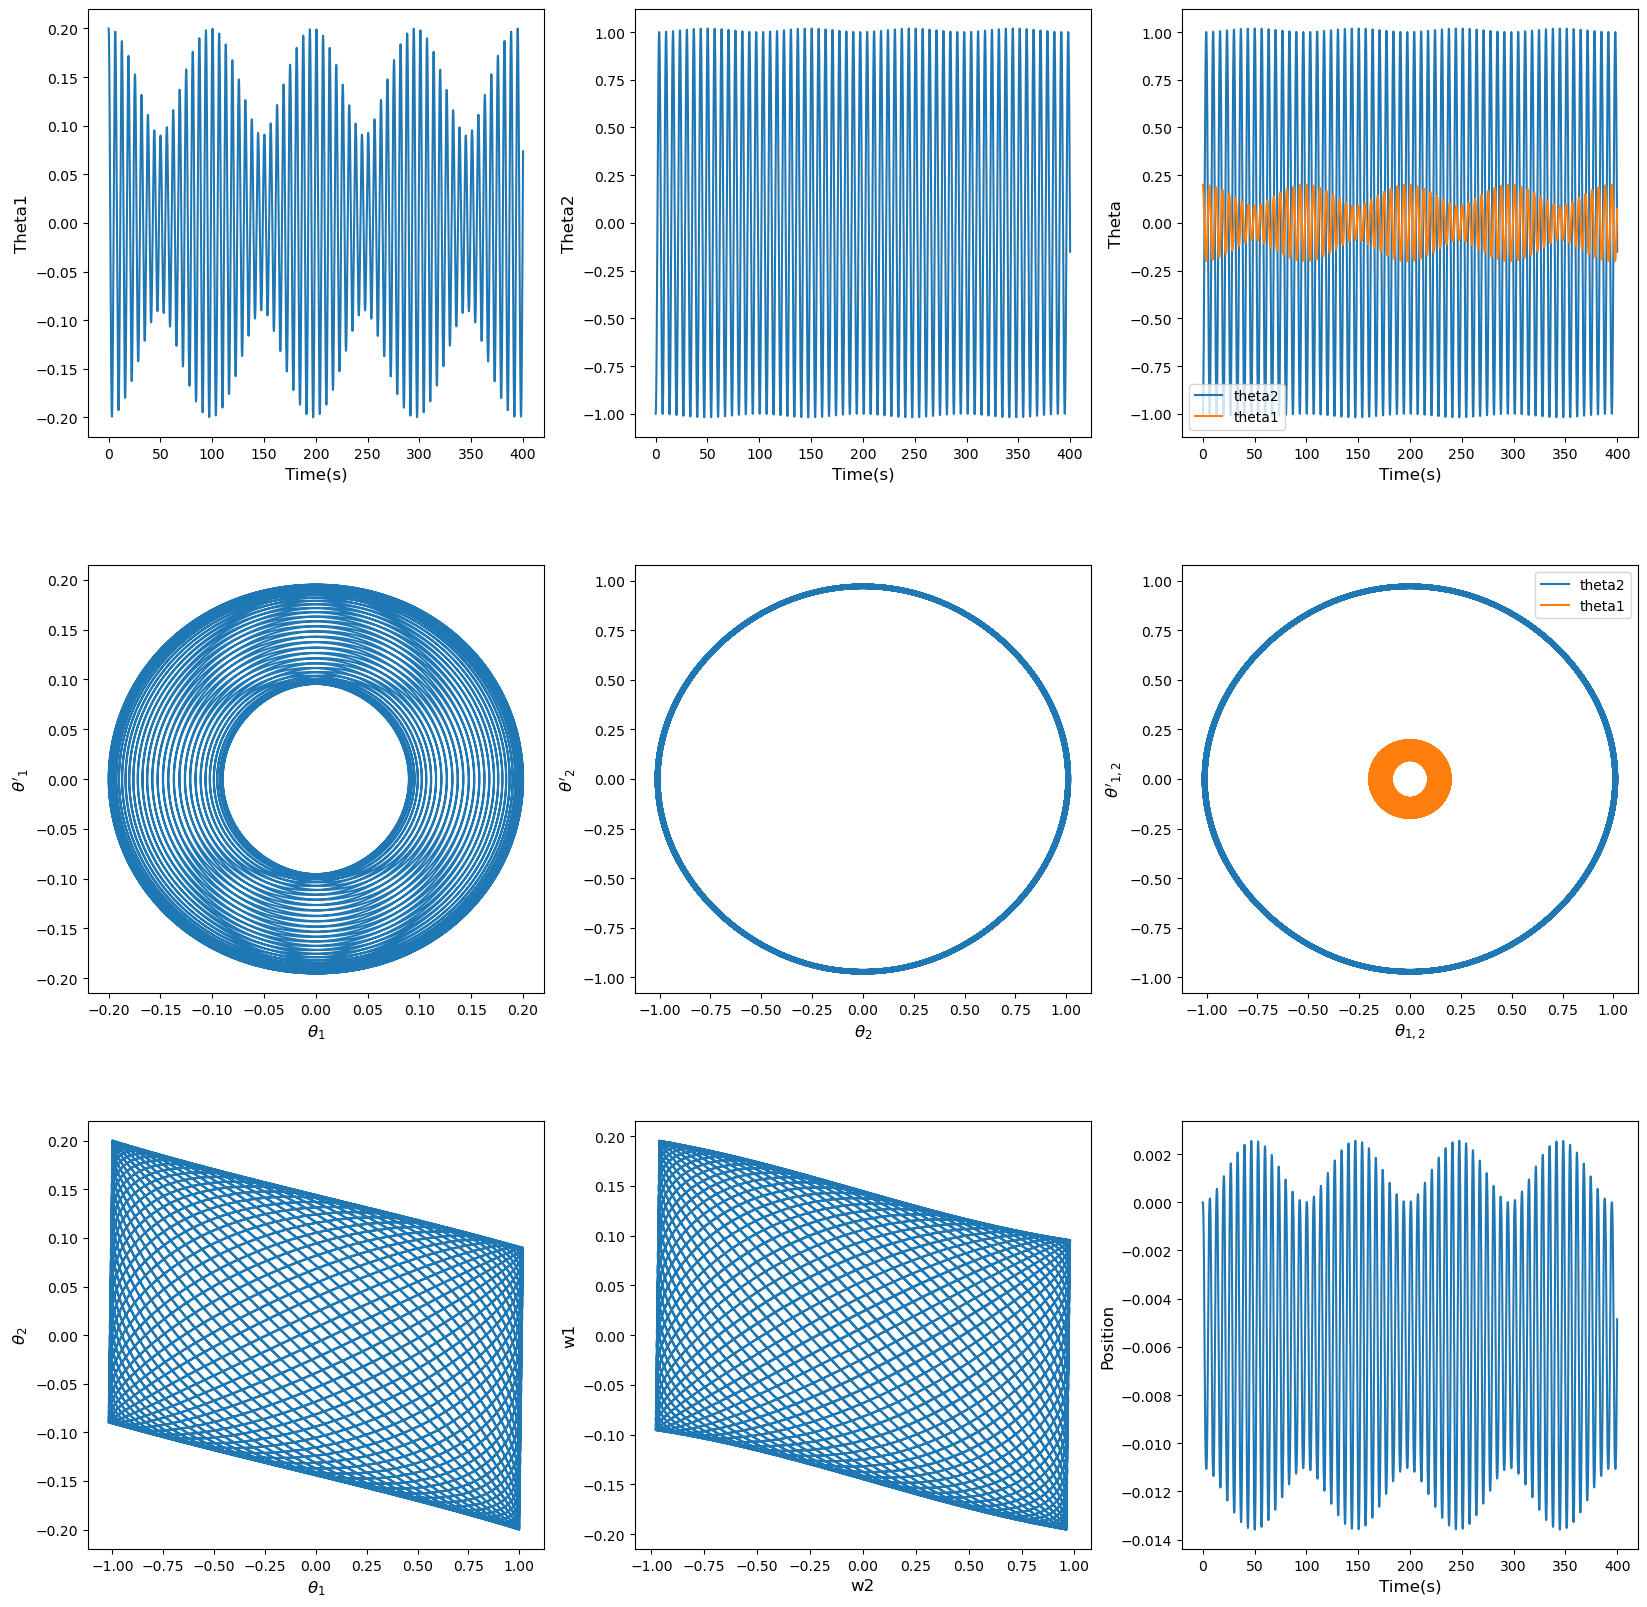

In [88]:
show_plot(df)

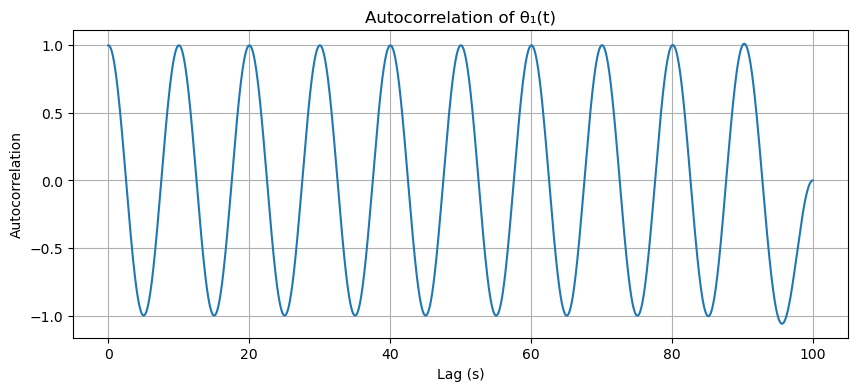

Autocorrelation peaks occur at lags (s): [3.000e-02 1.003e+01 2.003e+01 3.003e+01 4.004e+01 5.005e+01 6.006e+01
 7.008e+01 8.012e+01 9.026e+01]
Estimated period from autocorrelation: 10.0256 s
CPU times: total: 547 ms
Wall time: 114 ms


In [48]:
%%time
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# --- Replace these with your actual data ---
# For demonstration, we create a synthetic periodic signal:
# dt = 0.01
dt = 0.01
t = np.linspace(0, 100, 10000)         # time array from 0 to 100 seconds
theta1 = np.sin(2 * np.pi * t / 10)     # a sine wave with period 10 seconds

# --- Autocorrelation function ---
def autocorrelation_same_norm_unbiased(x):
    x = x - np.mean(x)
    n = len(x)
    result = np.correlate(x, x, mode='full')
    result = result[result.size // 2:]
    # Create an array with the number of overlapping points for each lag:
    overlap = np.arange(n, 0, -1)
    unbiased = result / overlap
    return unbiased / unbiased[0]




auto_corr = autocorrelation_same_norm_unbiased(theta1)
lags = np.arange(len(auto_corr)) * dt  # convert lag indices to time lags

plt.figure(figsize=(10, 4))
plt.plot(lags, auto_corr)
plt.xlabel('Lag (s)')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of θ₁(t)')
plt.grid(True)
plt.show()

# --- Identify peaks in the autocorrelation ---
peaks, _ = find_peaks(auto_corr, height=0.2)  # adjust the height threshold if needed

# Print out the lag times at which peaks occur
print("Autocorrelation peaks occur at lags (s):", lags[peaks])

# If the signal is periodic, you should see equally spaced peaks.
if len(peaks) > 1:
    estimated_period = np.diff(lags[peaks]).mean()
    print(f"Estimated period from autocorrelation: {estimated_period:.4f} s")
else:
    print("Not enough peaks were found to estimate a period.")


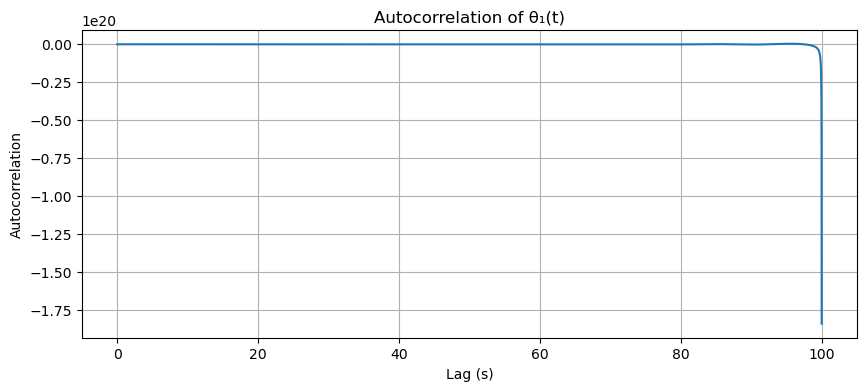

Autocorrelation peaks occur at lags (s): [ 5.04 15.04 25.04 35.05 45.05 55.06 65.08 75.1  85.17 95.54]
Estimated period from autocorrelation: 10.0556 s


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Assuming df["theta1"] is your data and dt is defined
dt = 0.01
t = np.linspace(0, 100, 10000)         # time array from 0 to 100 seconds
theta1 = np.sin(2 * np.pi * t / 10)  

def autocorrelation_fft_unbiased(x):
    x = x - np.mean(x)
    n = len(x)
    fft_x = np.fft.fft(x, n=2*n - 1)
    acorr = np.fft.ifft(fft_x * np.conjugate(fft_x)).real
    acorr = acorr[n - 1:]
    # Overlap counts: at lag l there are (n-l) overlapping points.
    overlap = np.arange(n, 0, -1)
    unbiased = acorr / overlap
    return unbiased / unbiased[0]



auto_corr = autocorrelation_fft_unbiased(theta1)
lags = np.arange(len(auto_corr)) * dt

plt.figure(figsize=(10, 4))
plt.plot(lags, auto_corr)
plt.xlabel('Lag (s)')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of θ₁(t)')
plt.grid(True)
plt.show()

# Identify peaks in the autocorrelation
peaks, _ = find_peaks(auto_corr, height=0.2)
print("Autocorrelation peaks occur at lags (s):", lags[peaks])
if len(peaks) > 1:
    estimated_period = np.diff(lags[peaks]).mean()
    print(f"Estimated period from autocorrelation: {estimated_period:.4f} s")
else:
    print("Not enough peaks were found to estimate a period.")


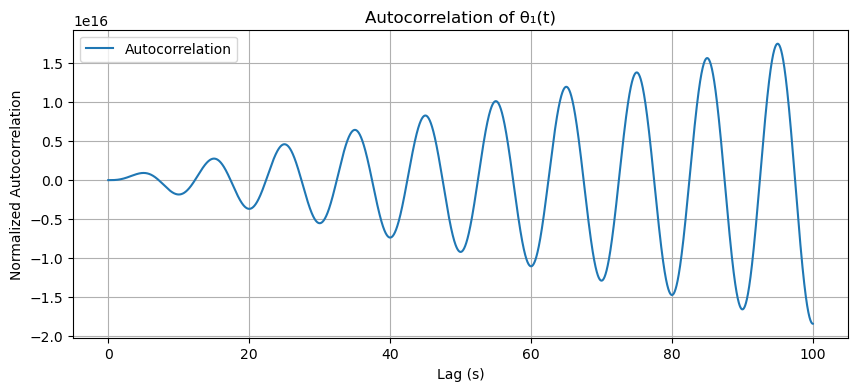

Autocorrelation peaks occur at lags (s): [ 5.01 15.01 25.01 35.01 45.01 55.   65.   75.   85.   95.  ]
Estimated period from autocorrelation: 9.9989 s


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# --- User-supplied data ---
# Make sure to set dt appropriately
dt = 0.01
t = np.linspace(0, 100, 10000)         # time array from 0 to 100 seconds
theta1 = np.sin(2 * np.pi * t / 10)  

# --- FFT-based autocorrelation function ---
def autocorrelation_fft(x):
    x = x - np.mean(x)
    n = len(x)
    # Use zero padding to length 2*n-1 for a proper convolution
    fft_x = np.fft.fft(x, n=2*n-1)
    acorr = np.fft.ifft(fft_x * np.conjugate(fft_x)).real
    acorr = acorr[n-1:]  # take non-negative lags
    return acorr / acorr[0]  # Normalize so that acorr[0] == 1

auto_corr = autocorrelation_fft(theta1)
lags = np.arange(len(auto_corr)) * dt

# --- Plot the autocorrelation ---
plt.figure(figsize=(10, 4))
plt.plot(lags, auto_corr, label="Autocorrelation")
plt.xlabel('Lag (s)')
plt.ylabel('Normalized Autocorrelation')
plt.title('Autocorrelation of θ₁(t)')
plt.grid(True)
plt.legend()
plt.show()

# --- Identify peaks in the autocorrelation ---
# Find all peaks, then remove the one at lag=0 (and any very close to it)
peaks, _ = find_peaks(auto_corr, height=0.2)  # adjust height threshold if needed

# Exclude peaks at very small lag (e.g., < 0.1 s) to ignore the zero-lag artifact.
valid_peaks = peaks[lags[peaks] > 0.1]

print("Autocorrelation peaks occur at lags (s):", lags[valid_peaks])

# If the signal is periodic, you should see equally spaced peaks.
if len(valid_peaks) > 1:
    # Compute the differences between successive valid peaks.
    estimated_period = np.diff(lags[valid_peaks]).mean()
    print(f"Estimated period from autocorrelation: {estimated_period:.4f} s")
else:
    print("Not enough peaks were found to estimate a period.")


# lyponent Constant

Computing Lyapunov exponent for R = 1.000
Computing Lyapunov exponent for R = 1.211
Computing Lyapunov exponent for R = 1.421
Computing Lyapunov exponent for R = 1.632
Computing Lyapunov exponent for R = 1.842
Computing Lyapunov exponent for R = 2.053
Computing Lyapunov exponent for R = 2.263
Computing Lyapunov exponent for R = 2.474
Computing Lyapunov exponent for R = 2.684
Computing Lyapunov exponent for R = 2.895
Computing Lyapunov exponent for R = 3.105
Computing Lyapunov exponent for R = 3.316
Computing Lyapunov exponent for R = 3.526
Computing Lyapunov exponent for R = 3.737
Computing Lyapunov exponent for R = 3.947
Computing Lyapunov exponent for R = 4.158
Computing Lyapunov exponent for R = 4.368
Computing Lyapunov exponent for R = 4.579
Computing Lyapunov exponent for R = 4.789
Computing Lyapunov exponent for R = 5.000


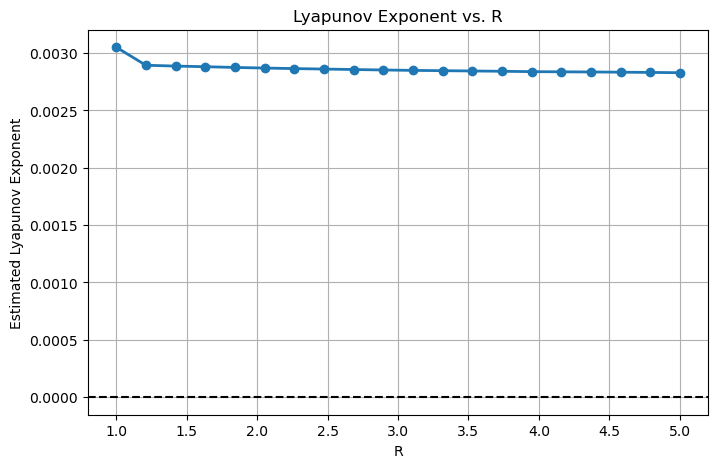

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example: your rk4 function should be defined elsewhere.
# It should return data in a format that can be converted to a DataFrame,
# e.g. a list of lists or a numpy array with 7 columns corresponding to:
# ["theta1", "theta2", "w1", "w2", "x", "v_x", "t"]

def compute_lyapunov(rk4, state0, state0_pert, l1, l2, R, k, c_x, dt, N, 
                     perturb_threshold=1e-2):
    """
    Compute the largest Lyapunov exponent for a given parameter R.
    
    Parameters:
        rk4              : function to integrate the system.
        state0           : initial condition (array-like) for the base trajectory.
        state0_pert      : perturbed initial condition (array-like).
        l1, l2           : pendulum lengths.
        R, k, c_x        : system parameters.
        dt               : time step.
        N                : number of integration steps.
        perturb_threshold: maximum separation (distance) for valid linear regime.
        
    Returns:
        lyapunov_exp: estimated largest Lyapunov exponent (slope).
    """
    # Run simulation for the base trajectory
    data1 = rk4(state0[0], state0[1], state0[2], state0[3], state0[4], state0[5],
                l1, l2, R, k, c_x, dt, N)
    # Run simulation for the perturbed trajectory
    data2 = rk4(state0_pert[0], state0_pert[1], state0_pert[2], state0_pert[3],
                state0_pert[4], state0_pert[5],
                l1, l2, R, k, c_x, dt, N)
    
    # Convert to DataFrames using the given column names
    df1 = pd.DataFrame(data1, columns=["theta1", "theta2", "w1", "w2", "x", "v_x", "t"])
    df2 = pd.DataFrame(data2, columns=["theta1", "theta2", "w1", "w2", "x", "v_x", "t"])
    
    # Compute the Euclidean distance between trajectories at each time step,
    # using only the state variables (ignore the time column)
    state_cols = ["theta1", "theta2", "w1", "w2", "x", "v_x"]
    traj1 = df1[state_cols].to_numpy()
    traj2 = df2[state_cols].to_numpy()
    
    differences = np.linalg.norm(traj1 - traj2, axis=1)
    
    # Build a time array using the 't' column from one of the DataFrames
    t = df1["t"].to_numpy()
    
    # Use only the part where the separation remains within the linear regime.
    valid = differences < perturb_threshold
    if np.sum(valid) < 10:
        return np.nan  # Not enough data in the linear regime for a reliable estimate
    
    # Compute the logarithm of the separation in the valid region
    log_diff = np.log(differences[valid])
    
    # Fit a line to log_diff vs. time; the slope gives the Lyapunov exponent.
    slope, intercept = np.polyfit(t[valid], log_diff, 1)
    
    return slope

# ----------------- Main Loop -----------------

# Define common initial conditions for your simulation
theta1_0 = 0.2
theta2_0 = -1.0
w1_0 = 0.0
w2_0 = 0.0
x0 = 0.0
v0 = 0.0

# System parameters (other than R)
l1 = 1.0
l2 = 1.0
k = 0.0
c_x = 0.0
dt = 0.01
N = 100000  # Adjust as needed

# Prepare a list of R values to test
R_values = np.linspace(1, 5, 20)  # For example, 20 values between 1 and 5
lyapunov_exponents = []

# Base initial state vector
state0 = np.array([theta1_0, theta2_0, w1_0, w2_0, x0, v0])
# Create a perturbed initial condition (perturb one variable slightly)
perturbation = 1e-6
state0_pert = state0.copy()
state0_pert[0] += perturbation  # perturb theta1 slightly

for R in R_values:
    print(f"Computing Lyapunov exponent for R = {R:.3f}")
    le = compute_lyapunov(rk4, state0, state0_pert, l1, l2, R, k, c_x, dt, N,
                          perturb_threshold=1e-2)
    lyapunov_exponents.append(le)

lyapunov_exponents = np.array(lyapunov_exponents)

# Plot the Lyapunov exponent vs. R
plt.figure(figsize=(8, 5))
plt.plot(R_values, lyapunov_exponents, 'o-', lw=2)
plt.axhline(0, color='k', ls='--')
plt.xlabel("R")
plt.ylabel("Estimated Lyapunov Exponent")
plt.title("Lyapunov Exponent vs. R")
plt.grid(True)
plt.show()


Computing Lyapunov exponent for R = 1.000
Computing Lyapunov exponent for R = 2.000
Computing Lyapunov exponent for R = 3.000
Computing Lyapunov exponent for R = 4.000
Computing Lyapunov exponent for R = 5.000
Computing Lyapunov exponent for R = 6.000
Computing Lyapunov exponent for R = 7.000
Computing Lyapunov exponent for R = 8.000
Computing Lyapunov exponent for R = 9.000
Computing Lyapunov exponent for R = 10.000
Computing Lyapunov exponent for R = 11.000
Computing Lyapunov exponent for R = 12.000
Computing Lyapunov exponent for R = 13.000
Computing Lyapunov exponent for R = 14.000
Computing Lyapunov exponent for R = 15.000
Computing Lyapunov exponent for R = 16.000
Computing Lyapunov exponent for R = 17.000
Computing Lyapunov exponent for R = 18.000
Computing Lyapunov exponent for R = 19.000
Computing Lyapunov exponent for R = 20.000


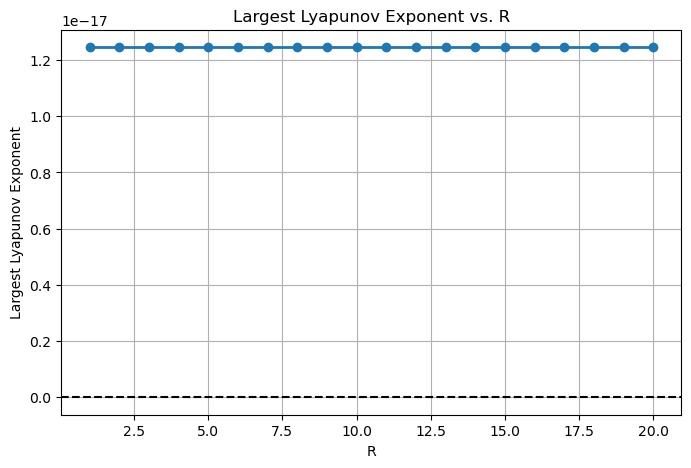

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assume your rk4 function is defined somewhere, with signature:
# rk4(theta1, theta2, w1, w2, x, v, l1, l2, R, k, c_x, dt, N)
# and it returns data as an array or list of lists with columns:
# ["theta1", "theta2", "w1", "w2", "x", "v_x", "t"]

def compute_largest_lyapunov(rk4, state0, state0_pert, l1, l2, R, k, c_x, dt, N, 
                             perturb_threshold=1e-2):
    """
    Compute the largest Lyapunov exponent using two nearby trajectories.
    
    Parameters:
      rk4              : integration function for your system.
      state0           : base initial state [theta1, theta2, w1, w2, x, v_x].
      state0_pert      : perturbed initial state (differing by a small amount).
      l1, l2           : lengths (or other system parameters).
      R, k, c_x        : system parameters.
      dt               : time step.
      N                : number of steps.
      perturb_threshold: threshold for valid linear regime (separation must be below this).
    
    Returns:
      lyap_exp         : estimated largest Lyapunov exponent.
    """
    # Run simulation for the base trajectory
    data1 = rk4(state0[0], state0[1], state0[2], state0[3], state0[4], state0[5],
                l1, l2, R, k, c_x, dt, N)
    # Run simulation for the perturbed trajectory
    data2 = rk4(state0_pert[0], state0_pert[1], state0_pert[2], state0_pert[3],
                state0_pert[4], state0_pert[5],
                l1, l2, R, k, c_x, dt, N)
    
    # Convert simulation data to DataFrames with the proper columns
    df1 = pd.DataFrame(data1, columns=["theta1", "theta2", "w1", "w2", "x", "v_x", "t"])
    df2 = pd.DataFrame(data2, columns=["theta1", "theta2", "w1", "w2", "x", "v_x", "t"])
    
    # Use only the state variables for the distance (ignore time)
    state_cols = ["theta1", "theta2", "w1", "w2", "x", "v_x"]
    traj1 = df1[state_cols].to_numpy()
    traj2 = df2[state_cols].to_numpy()
    
    # Compute the Euclidean distance at each time step
    differences = np.linalg.norm(traj1 - traj2, axis=1)
    
    # Extract the time vector (assuming it's the same in both runs)
    t = df1["t"].to_numpy()
    
    # Select only the portion where the separation is small (linear regime)
    valid_idx = differences < perturb_threshold
    if np.sum(valid_idx) < 10:
        # Not enough points in the linear regime to reliably estimate the exponent
        return np.nan
    
    # Compute the natural log of the separation
    log_diff = np.log(differences[valid_idx])
    
    # Fit a line to log_diff vs. time; the slope is the largest Lyapunov exponent.
    slope, intercept = np.polyfit(t[valid_idx], log_diff, 1)
    
    return slope

# ----------------- Main Loop -----------------

# Define the base initial conditions for your simulation
theta1_0 = 0.2
theta2_0 = -1.0
w1_0 = 0.0
w2_0 = 0.0
x0 = 0.0
v0 = 0.0

# Other system parameters (except R)
l1 = 1.0
l2 = 1.0
k = 0.0
c_x = 0.0
dt = 0.01
N = 100000  # Adjust as needed

# Create a range of R values to test
R_values = np.linspace(1, 20, 20)
lyapunov_exponents = []

# Base initial state vector
state0 = np.array([theta1_0, theta2_0, w1_0, w2_0, x0, v0])
# Create a perturbed initial condition (perturb theta1 slightly)
perturbation = 1e-6
state0_pert = state0.copy()
state0_pert[0] += perturbation

# Loop over R values
for R in R_values:
    print(f"Computing Lyapunov exponent for R = {R:.3f}")
    le = compute_largest_lyapunov(rk4, state0, state0_pert, l1, l2, R, k, c_x, dt, N,
                                  perturb_threshold=1e-2)
    lyapunov_exponents.append(le)

lyapunov_exponents = np.array(lyapunov_exponents)

# Plot the largest Lyapunov exponent vs. R
plt.figure(figsize=(8, 5))
plt.plot(R_values, lyapunov_exponents, 'o-', lw=2)
plt.axhline(0, color='k', ls='--')
plt.xlabel("R")
plt.ylabel("Largest Lyapunov Exponent")
plt.title("Largest Lyapunov Exponent vs. R")
plt.grid(True)
plt.show()


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compute_largest_lyapunov(rk4, state0, state0_pert, l1, l2, R, k, c_x, dt, N, 
                             perturb_threshold=1e-2):
    """
    Compute the largest Lyapunov exponent using two nearby trajectories.
    
    Parameters:
      rk4              : integration function for your system.
      state0           : base initial state [theta1, theta2, w1, w2, x, v_x].
      state0_pert      : perturbed initial state (differing by a small amount).
      l1, l2           : lengths (or other system parameters).
      R, k, c_x        : system parameters.
      dt               : time step.
      N                : number of steps.
      perturb_threshold: threshold for valid linear regime (separation must be below this).
    
    Returns:
      lyap_exp         : estimated largest Lyapunov exponent.
    """
    # Run simulation for the base trajectory
    data1 = rk4(state0[0], state0[1], state0[2], state0[3], state0[4], state0[5],
                l1, l2, R, k, c_x, dt, N)
    # Run simulation for the perturbed trajectory
    data2 = rk4(state0_pert[0], state0_pert[1], state0_pert[2], state0_pert[3],
                state0_pert[4], state0_pert[5],
                l1, l2, R, k, c_x, dt, N)
    
    # Convert simulation data to DataFrames with the proper columns
    df1 = pd.DataFrame(data1, columns=["theta1", "theta2", "w1", "w2", "x", "v_x", "t"])
    df2 = pd.DataFrame(data2, columns=["theta1", "theta2", "w1", "w2", "x", "v_x", "t"])
    
    # Use only the state variables for the distance (ignore time)
    state_cols = ["theta1", "theta2", "w1", "w2", "x", "v_x"]
    traj1 = df1[state_cols].to_numpy()
    traj2 = df2[state_cols].to_numpy()
    
    # Compute the Euclidean distance at each time step
    differences = np.linalg.norm(traj1 - traj2, axis=1)
    
    # Extract the time vector (assuming it's the same in both runs)
    t = df1["t"].to_numpy()
    
    # Select only the portion where the separation is small (linear regime)
    valid_idx = differences < perturb_threshold
    if np.sum(valid_idx) < 10:
        # Not enough points in the linear regime to reliably estimate the exponent
        return np.nan
    
    # Compute the natural log of the separation
    log_diff = np.log(differences[valid_idx])
    
    # Fit a line to log_diff vs. time; the slope is the largest Lyapunov exponent.
    slope, intercept = np.polyfit(t[valid_idx], log_diff, 1)
    
    return slope

# ----------------- Main Code -----------------
if __name__ == "__main__":
    # Define the base initial conditions
    theta1_0 = 0.1
    theta2_0 = 0.7
    w1_0 = 0.0
    w2_0 = 0.0
    x0 = 0.0
    v0 = 0.0

    # Other system parameters (except R)
    l1 = 1.0
    l2 = 1.0
    k = 0.0
    c_x = 0.0
    dt = 0.0005
    N = 2_000_000  # number of steps

    # CHOOSE A SINGLE R VALUE
    R_chosen = 0.56  # e.g. R=5.0

    # Base initial state vector
    state0 = np.array([theta1_0, theta2_0, w1_0, w2_0, x0, v0])
    # Create a perturbed initial condition (perturb theta1 slightly)
    perturbation = 1e-6
    state0_pert = state0.copy()
    state0_pert[0] += perturbation


    # Compute the Lyapunov exponent for the chosen R
    le = compute_largest_lyapunov(rk4, state0, state0_pert, l1, l2, R_chosen, k, c_x, dt, N,
                                  perturb_threshold=1e-2)
    print(f"Largest Lyapunov exponent at R={R_chosen}: {le}")


Largest Lyapunov exponent at R=0.56: 0.0028711012588790276


In [ ]:
0.005509312527108088